# Исследование объявлений о продаже квартир

У нас есть архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div style="border:solid blue 2px; padding: 20px">
    
**Задача** 

Выявить, какие параметры влияют на рыночную стоимость объектов недвижимости.
    
**Описание**

В документе содержатся данные о недвижимости в Санкт-Петербурге и Ленинградской области за несколько лет.
 
Данные были записаны двуми способами:
*вручную, т.е. пользователем;
*автоматически, т.е. получены на основе картографических данных.

Для решения данной задачи будет использоваться следующий план:

* Бегло проанализировать данные, чтобы понять первичные ошибки датасета
* Написать промежуточный вывод по первичному анализу
* Предположить несколько гипотез, характерных для датасета
* Обработать датасет, а именно:
    * провести удаление пропущенных значений 
    * провести заполенение пропущенных значений медианными или 0
    * проверить корректное название столбцов
    * выявить аномалии
    * найти дубликаты
    * заменить некорректные типы данных 
* Написать промежуточный вывод по обработке датасета
* Добавить необходимые дополнительные столбцы
* Провести исследовательский анализ данных
* Написать общий вывод

##  Изучаю общую информацию

Открываю файл через библиотеку pandas и импортирую библиотеку matplotlib для дальнейшей работы

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('____/real_estate_data.csv')

Смотрим информацию о файле

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Видим, что данные отражаются некорректно, выводим таблицу на экран, чтобы лучше понять проблему. 

In [5]:
data.head()

total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...                                                                                                                                                                                                                                                                  
3  0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...                                                                                                                                                                                                                                                                  
4  2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...

Данные "слиплись", все читается как один столбец. 
Они неверно отформатированы. Применим разделитель. 

In [6]:
data = pd.read_csv('____/real_estate_data.csv', sep='\t')

In [7]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

Сейчас данные легче читать. Посмотрим данные подробнее. 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div style="border:solid orange 2px; padding: 20px">

**Промежуточный вывод**
    
В данных мы видим наличие 22 столбцов и 23699 записей. Есть несколько столбцов с пропущенными значениями: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest,ponds_around3000, ponds_nearest, days_exposition.

Из описания данных можно сравнить представленную информацию по стобцам и их типам. 
1) first_day_exposition в таблице представлен как object, нам нужно будет отформатировать его в формат даты datetime.


2) floors_total в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.


3) is_apartment в таблице представлен как object, нам нужно будет отформатировать его в булев тип.


4) balcony в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.


5) parks_around3000 в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.


6) ponds_around3000 в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.


7) days_exposition в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.  
    
8) last_price в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

Построим гистрограммы, чтобы визуально посмотреть значения с  числовыми столбцами.

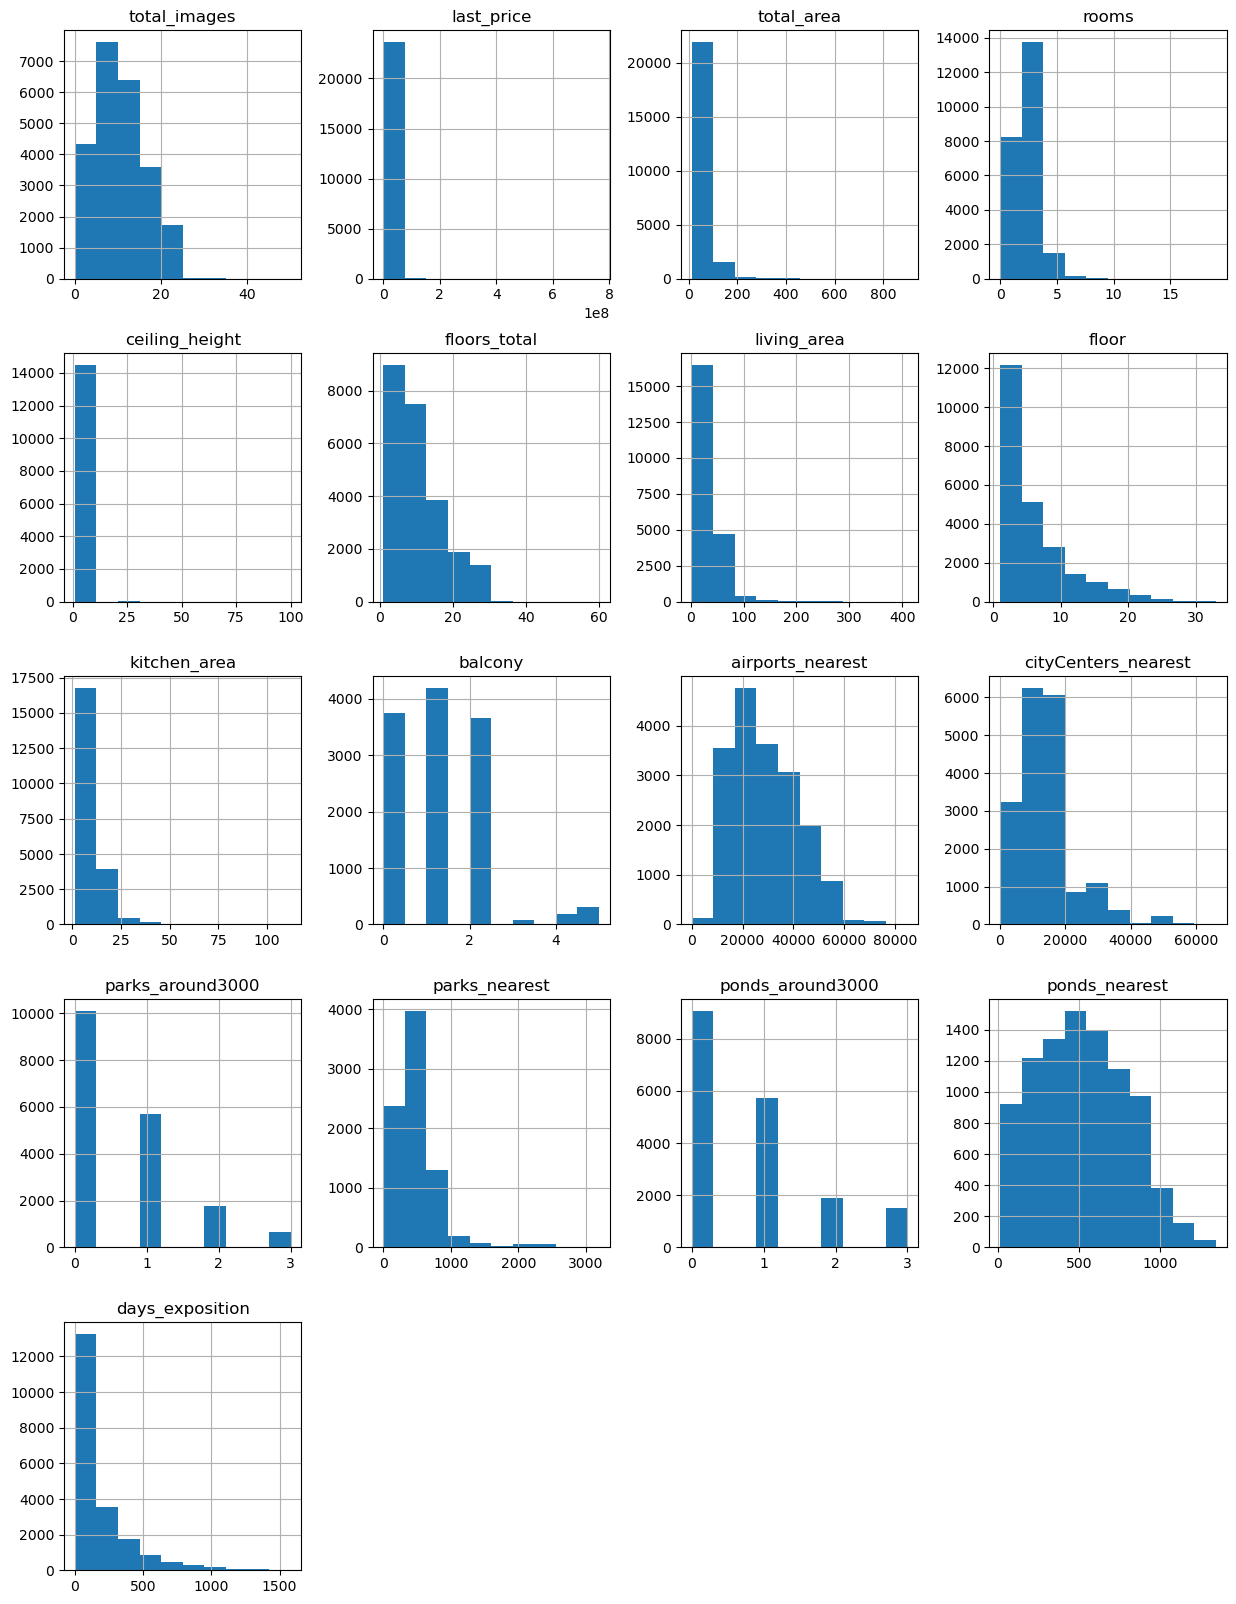

In [9]:
data.hist(figsize=(15, 20))
plt.show()

<div style="border:solid orange 2px; padding: 20px">

**Промежуточный вывод**
    
Из гистограмм можно увидеть следующую информацию:

1) непонятен график last price,  всего 1 столбец со значениями 25000. Выяснить, влияет ли этот столбец на что-то в анализе.

2) большая часть квартир (более 20000) имеет площадь до 100 кв.м.

3) большая часть квартир имеет 2-4 комнаты.

4) из графика ceiling_height видно, что все квартиры (порядка 14000) имеют высоту потолка до 10 м, а остальные еще больше. Данные странные, так как средняя высота потолков в России 2,65 м. Проверить эти данные.

5) большая часть квартир находится в 5-10 этажных домах.

6) жилая площадь большинства квартир составляет до 50 кв.м.

7) большая часть квартир находятся с 1-го по 5-ый этаж. 

8) большая часть квартир имеют площадь кухни до 13 кв.м.

9) практически равным образом распределилось количество балконов в квартирах.
    Примерно 3800 квартир не имеют балконов, 4200 квартир имеют 1 балкон, и порядка 3700 квартир имеют по 2 балкона. 
    Видны "выбросы" в данных по количесту балконов - 4 и больше. Это может быть связано с тем, что balcony в таблице представлен как float64.

10) большая часть квартир находится на расстоянии до 40000 м от аэропорта. 

11) большая часть квартир находится на расстоянии до 20000 м от центра города.

12) большая часть квартир (порядка 10000) не имеет парка в радиусе 3 км. У порядка 5900 квартир есть 1 парк в радиусе 3 км рядом.

13) большинство квартир имеют ближайщий парк на расстоянии до 800 м. 

14) большинство квартир не имеют водоемов в радиусе 3 км. 

15) у большинства квартир расстояние до ближайшего водоема до 900 м.

16) основная часть объявлений была размещена сроком до 100 дней. 

<div style="border:solid blue 2px; padding: 20px">
    
## Вывод по разделу 1. <a class="tocSkip">
    
1) В данных имеются пропущенные значения, часть данных имеет несвойственный им тип данных.
    
2) Требуется рассмотреть столбец last_price более детально, из гистограммы непонятно, какая именно была последняя цена на момент публикации, так как виден только 1 столбец. 
    
3) Преобладают квартиры с площадью до 100 кв.метров, более крупные объекты недвижимости, хотя и доступны, встречаются реже. Также наблюдается повышенный спрос на 1-комнатные квартиры, что может быть вызвано притоком студентов из других городов, покупкой маленькой, но находящейся в центре квартиры для одиноких молодых людей.  
    
4) В таблице ввиду пропущенных данных наблюдается диссонанс в картографических данных: большая часть квартир (порядка 10000) не имеет парка в радиусе 3 км, но большинство квартир имеют ближайщий парк на расстоянии до 800 м;
    большинство квартир не имеют водоемов в радиусе 3 км, но у большинства квартир расстояние до ближайшего водоема до 900 м. 
    
Можно выявить следующие *гипотезы* на текущем этапе:
    
1) На рынке недвижимости преобладают 2-4-х комнатные квартиры общей площадью до 100 кв.м.  
    
2) Целевая аудитория - это семейные пары с детьми, предпочитающие иметь квартиру ближе к центру города ввиду близости школ, детских садов и инфраструктуры, но при этом живя не в новостройках, так как большинство квартир находятся в низких по современным меркам домах - до 5 или до 10 этажей. 
    Еще одна целевая аудитория - люди без пары или семейные пары без детей, так как основная часть квартир на продаже имеет жилую площадь до 50 кв.м. 
    
3) Недвижимость с уникальными характеристиками (например, высокими потолками) или расположением (например, очень близко к центрам городов или паркам) может стоить дороже или продаваться быстрее.
    
4) Объявления, которые остаются на рынке в течение длительного периода времени, могут иметь завышенную цену или быть менее привлекательными из-за различных факторов, таких как местоположение, размер или состояние квартиры.

## Предобработка данных

### Работа с названиями столбцов

Практически все названия столбцов соответствуют правилам, однако, есть столбцы, название которых нужно исправить:

In [10]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

Взяла новую переменную, чтобы переименование столбцов было применено ко всей таблице. Проверяю, как отработал метод.

In [11]:
data.head(3)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   

  city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0              16028.0                1.0          482.0                2.0   
1              18603.0                0.0            NaN                0.0   
2              13933.0                1.0           90.0                2.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  

[3 rows x 22 columns]

### Работа с пропущенными значениями 

Как ранее мы увидели с помощью метода info(), есть несколько столбцов с пропущенными значениями: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest,ponds_around3000, ponds_nearest, days_exposition.

Применим еще один метод для анализа пропущенных значений - isna() и sum(), чтобы увидеть количество пропущенных значений в столбцах.

In [12]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 2.2** Из полученных данных видим, что во многих столбцах есть много пропущенных значений.
    
* ceiling_height - 9195. *Большое число пропусков, возможно, стоит заполнить медианными значениями, однако, в гистограмме видно, что высота потолка может достигать больше 5 м, что несвойственно для стандартных квартир.*
* floors_total - 86. *Маленькое число пропущенных значений, возможно, можем удалить данные.* 
* living_area - 1903. *Возможно, стоит заполнить медианными значениями.* 
* is_apartment - 20924. *Большое число пропусков, так как это должен быть булев тип, возможно, можно заполнить false.*
* kitchen_area - 2278. *Возможно, стоит заполнить медианными значениями.*
* balcony - 11519. *Скорее всего пропущенные значения - это квартиры без балконов, поэтому можем заполнить пропуски 0.*
* locality_name - 49. *Маленькое число пропущенных значений, можем удалить данные.* 
* airports_nearest - 5542. *Эти и последующие цифры взяты из картографических данных, стоит исследовать поподробнее, так как пропуски +- похожи по числу пропущенных значений, а также есть диссонанс в данных, о котором упоминала в комментарии выше.*  
* city_centers_nearest - 5519. *Эти и последующие цифры взяты из картографических данных, стоит исследовать поподробнее, так как пропуски +- похожи по числу пропущенных значений, а также есть диссонанс в данных, о котором упоминала в комментарии выше.*   
* parks_around3000 - 5518. *Эти и последующие цифры взяты из картографических данных, стоит исследовать поподробнее, так как пропуски +- похожи по числу пропущенных значений, а также есть диссонанс в данных, о котором упоминала в комментарии выше.*   
* parks_nearest - 15620. *Эти и последующие цифры взяты из картографических данных, стоит исследовать поподробнее, так как пропуски +- похожи по числу пропущенных значений, а также есть диссонанс в данных, о котором упоминала в комментарии выше.*   
* ponds_around3000 - 5518. *Эти и последующие цифры взяты из картографических данных, стоит исследовать поподробнее, так как пропуски +- похожи по числу пропущенных значений, а также есть диссонанс в данных, о котором упоминала в комментарии выше.*  
* ponds_nearest - 14589. *Эти и последующие цифры взяты из картографических данных, стоит исследовать поподробнее, так как пропуски +- похожи по числу пропущенных значений, а также есть диссонанс в данных, о котором упоминала в комментарии выше.* 
* days_exposition - 3181. *Возможно, объявление еще висит на публикации.*

### Заполнение пропусков  

####  Заполнение  `balcony`

Заполним пропуски нулями, где это возможно с помощью метода fillna(). Заполним 0 пропуски в 'balcony', так как пропуск может означать отсутствие балкона. 

In [13]:
data['balcony'] = data['balcony'].fillna(0)

Проверим, получилось ли заполнить данные 0 и остались ли пропуски:

In [14]:
print('Пропущенные значения в balcony:', data['balcony'].isna().sum())

Пропущенные значения в balcony: 0


Пропусков в 'balcony' нет.


####  Заполнение  `rooms`

Проанализируем 'rooms', так как он может быть связана с 'ceiling_height'. Чем больше квартир, тем выше вероятность, что квартира имеет 2 или 3 этажа c единой высотой потолка более 5 м и является пентхаусом. Посмотрим, какое количество комнат есть в квартирах вцелом. 

In [15]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Мы видим, что есть минимальное значение 0 и максимальное значение 19. Узнаем, какое количество квартир с 0 комнатами, 
возможно, они представляют собой квартиры-студии.  

In [16]:
print('Количество квартир с нулевыми комнатами:', data.query('rooms == 0')['rooms'].count())

Количество квартир с нулевыми комнатами: 197


In [17]:
data.query('rooms == 0').head()

total_images  last_price  total_area first_day_exposition  rooms  \
144             1   2450000.0       27.00  2017-03-30T00:00:00      0   
349             4   2320000.0       25.00  2017-09-27T00:00:00      0   
440             8   2480000.0       27.11  2018-03-12T00:00:00      0   
508             0   3375000.0       34.40  2017-03-28T00:00:00      0   
608             2   1850000.0       25.00  2019-02-20T00:00:00      0   

     ceiling_height  floors_total  living_area  floor is_apartment  ...  \
144             NaN          24.0        15.50      2          NaN  ...   
349             NaN          14.0        17.00      1          NaN  ...   
440             NaN          17.0        24.75      4          NaN  ...   
508             NaN          26.0        24.30     19          NaN  ...   
608             NaN          10.0          NaN      7          NaN  ...   

     kitchen_area  balcony      locality_name  airports_nearest  \
144           NaN      2.0     посёлок Мурино               NaN   
349           NaN      0.0    деревня Кудрово               NaN   
440           NaN      2.0    Санкт-Петербург           38171.0   
508           NaN      1.0  посёлок Парголово           53115.0   
608           NaN      0.0     посёлок Шушары               NaN   

    city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
144                  NaN                NaN            NaN                NaN   
349                  NaN                NaN            NaN                NaN   
440              15015.0                0.0            NaN                2.0   
508              19292.0                0.0            NaN                1.0   
608                  NaN                NaN            NaN                NaN   

     ponds_nearest  days_exposition  
144            NaN            181.0  
349            NaN             45.0  
440          982.0             64.0  
508          593.0            430.0  
608            NaN             29.0  

[5 rows x 22 columns]

Квартир с 0 комнатами 197 штук, также мы видим по общей площади квартиры, что, действительно, такие квартиры могут являться студиями. Также у таких квартир нет информации о кухне, так как студии не имееют как таковую кухню. 

Посмотрим взаимосвязь с квартирами с бОльшим количеством комнат:

In [18]:
print('Количество квартир с более 7-ю комнатами:',data.query('rooms >= 7')['rooms'].count())

Количество квартир с более 7-ю комнатами: 90


В выборке 90 квартир, где более чем 7 комнат. Так как мы рассматриваем недвижимость Ленинградской области и Санкт-Петербурга, то вероятность существования таких квартир высока ввиду наличия большого количества старого жилого фонда.

Проверим зависимость высоты потолка от количества комнат с помощью корреляции.

In [19]:
 data['rooms'].corr(data['ceiling_height'])

0.054457208627805564

<div style="border:solid orange 2px; padding: 20px">

**Промежуточный вывод**
    
Из проведенных действий, можно увидеть, что квартиры с количеством комнат 0 могут быть студиями, которые не имеют отдельной кухни. 
У крупных квартир с количеством комнат 7 и больше высота потолка является стандартной по меркам СНиП. Т.е. гипотеза о том, что квартиры с большим количеством комнат имеют высокие потолки - от 5 м и выше, отвергается, о чем говорит и корреляция Пирсона (зависимости нет - 5%).  

#### Заполнение `ceiling_height`

Проанализирую 'ceiling_height':

In [20]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что у нас в данных есть минимальное значение - это 1 м и максимальное значение - 100 м, присутствуют аномалии, так как средняя высота потолков в России - 2,65 м, а в рассмотренных ранее нами данных даже у квартир с большим количеством комнат высота потолка не выше 5 м. Построим "ящик с усами" для визуализации. 

(1.0, 100.0)

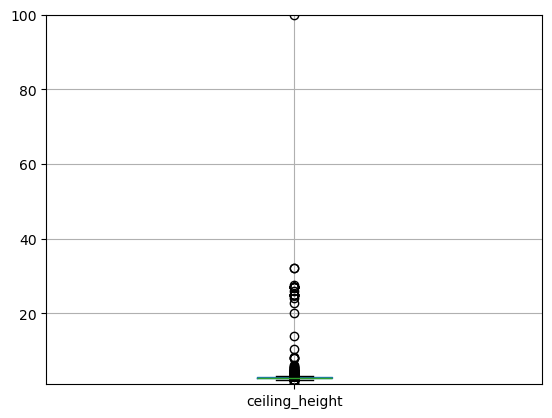

In [21]:
data.boxplot('ceiling_height')
plt.ylim(1,100)

Из данных выше видим, что у нас присутствуют аномалии: не бывает потолков выше 5 м. Возможно, 
в данных изначально была ошибка. Квартиры могут быть двухэтажные, по требованиям СНиП минимальная допустимая высота от пола до чистового потолка в жилых помещениях должна быть не менее 2,5 метра. Возьмем высоту потолка с запасом и поставим ограничение от 2,5 м до 5 м, так как в Петербурге есть квартиры с высокими потолками или переделанные нежилые помещения с высокими потолками в жилые.

In [22]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Так как у нас есть значения в выборке 25, 26, 27, 27.5, 32 метров и т.д., то можно предположить, что была ошибка в вводе данных и вместо 2.5 м ввели 25 м. Поэтому сделаем функцию, которая отфильтрует значения больше 25 (т.е. 2.5 м), но не больше 50 (т.е. 5 м, берем с небольшим запасом), и поделит их на 10. Далее применим наши изменения на весь столбец. 

In [23]:
def ceiling_height(height):
    if height >= 25 and height <= 50:
        return height/10
    else: 
        return height

In [24]:
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height)

Сейчас выведем медианное значение между минимальной высотой потолков от 2,5 и до 5.  

In [25]:
median_height = data.query('ceiling_height >= 2.5 and ceiling_height <= 5')['ceiling_height'].median()

In [26]:
print('Медианное значение высоты потолка:',median_height)

Медианное значение высоты потолка: 2.65


Применим наши условия для значений, которые не входят в разброс от 2.5 до 5 м и применим медианное значение к ним.

In [27]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = median_height

In [28]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = median_height

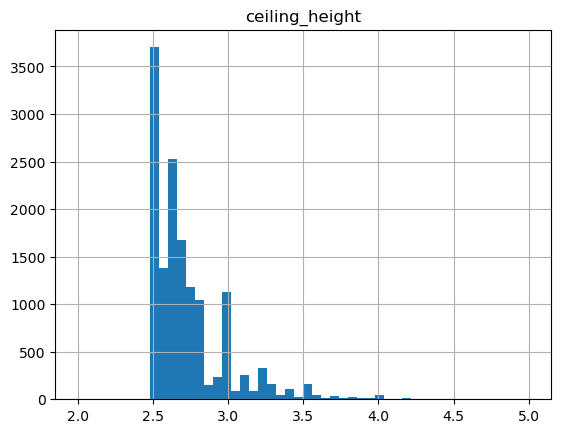

In [29]:
data.hist('ceiling_height',bins=50,range=(2,5));

Теперь на графике видны более реалистичные значения. 

Проверим, сколько пропущенных значений у нас сейчас. Ранее у нас было более 14 тыс. пропущенных значений, обработаем остальные и поставим медианное значение вместо пропусков: 

In [30]:
print('Пропущенные значения в ceiling_height:',data['ceiling_height'].isna().sum())

Пропущенные значения в ceiling_height: 9195


In [31]:
data['ceiling_height'] = data['ceiling_height'].fillna(median_height)

In [32]:
print('Пропущенные значения в ceiling_height:',data['ceiling_height'].isna().sum())

Пропущенные значения в ceiling_height: 0


Проверим результат метода:

In [33]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.696948
std          0.214602
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Метод отработал успешно.

#### Заполение `floors_total`

Как выявили ранее, у нас всего 86 пропущенных значений в 'floors_total', так как число небольшое, можем удалить строки с помощью метода dropna().

In [34]:
data = data.dropna(subset=['floors_total'])

Проверим результат метода

In [35]:
print('Пропущенные значения в floors_total:', data['floors_total'].isna().sum())

Пропущенные значения в floors_total: 0


Метод отработал успешно.

#### Заполение `locality_name`

Рассмотрим следующий столбец с пропущенными значениями - 'locality_name'. На текущий момент у нас 49 пропущенных значений, их мы никак не можем восстановить, поэтому проще будет их удалить:

In [36]:
data = data.dropna(subset=['locality_name'])

Проверим результат метода

In [37]:
print('Пропущенные значения в locality_name:', data['locality_name'].isna().sum())

Пропущенные значения в locality_name: 0


Метод отработал успешно.

#### Заполение `is_apartment`

Как мы уже видели, 'is_apartment' должен иметь булев тип данных, но на текущий момент он представлен как стринговое значение, т.е. строка. Заполним пропущенные данные значением False:

In [38]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [39]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим результат метода

In [40]:
print('Пропущенные значения в is_apartment:', data['is_apartment'].isna().sum())

Пропущенные значения в is_apartment: 0


In [41]:
data['is_apartment'].unique()

array([False,  True])

Проверка прошла успешно.

#### Заполение `living_area`

Рассмотрим следующий столбец с пропущенными значениями - 'living_area'.

In [42]:
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Видно, что max жилая площадь составляет 409 кв.м. и min 2 кв. м. По данным СНиП, общая жилая комната в 
однокомнатной квартире должна составлять не менее 14 кв.м. Исходя из этого, удалим аномальные значения и заполним остальные медианными.

Проделаем те же шаги, что и с 'ceiling_height'. Построим график, чтобы визуально увидеть расположение площади квартир. 

(1.0, 410.0)

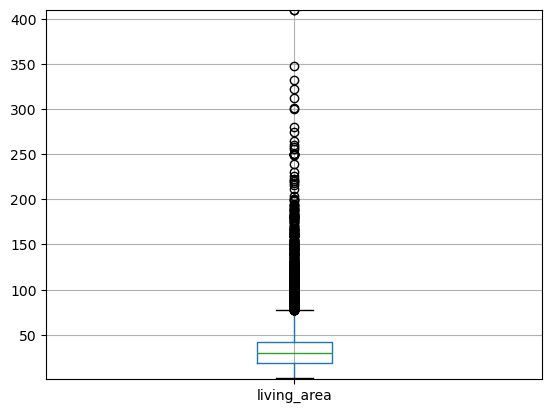

In [43]:
data.boxplot('living_area')
plt.ylim(1,410)

Ранее по гистрограммам мы могли сделать предположение, что жилая площадь квартир в основном составляла до 50 кв.м. Исследуем дальше. 

Отсортируем аномальные значения, чтобы увидеть, есть ли ошибка. 

In [44]:
print('Количество аномальных значений с жилой площадью 2 кв.м:', data.query('living_area == 2.0')['living_area'].count())

Количество аномальных значений с жилой площадью 2 кв.м: 2


In [45]:
data.query('living_area == 2.0').head()

total_images  last_price  total_area first_day_exposition  rooms  \
13915            20   6350000.0        52.0  2018-02-06T00:00:00      2   
21758             0   2330000.0        23.0  2018-01-01T00:00:00      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
13915            3.00           6.0          2.0      2         False  ...   
21758            2.65          24.0          2.0     22         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
13915           9.0      0.0  Санкт-Петербург           32453.0   
21758           NaN      0.0   посёлок Мурино               NaN   

      city_centers_nearest  parks_around_3000  parks_nearest  \
13915               6521.0                0.0            NaN   
21758                  NaN                NaN            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
13915                1.0         1012.0             91.0  
21758                NaN            NaN             66.0  

[2 rows x 22 columns]

Из данных мы видим, что в данных есть ошибка, не может быть, чтобы в квартире 52 кв.м. жилая площадь составляла 2 кв.м.
выведем количество квартир с жилой площадью менее 14 кв.м.

In [46]:
print('Жилая площадь менее 14 кв.м.: ',data.query('living_area < 14')['living_area'].count())

Жилая площадь менее 14 кв.м.:  314


 Так как в таблице встречались опечатки, посмотрим, есть ли ошибки в 'total_area' и 'living_area'. 'living_area' не должна быть больше 'total_area':  

In [47]:
print('Общая площадь меньше жилой площади: ',data.query('total_area < living_area')['living_area'].count())

Общая площадь меньше жилой площади:  0


Радует, что таких квартир нет. После заполнения медианными значениями удалим значения менее 14 кв.м. для чистоты данных. Вычислим медианное значение жилой площади

In [48]:
median_living_area = data['living_area'].median()

In [49]:
print('Медианное значение жилой площади:', median_living_area)

Медианное значение жилой площади: 30.0


У нас может возникнуть ситуация, что медианное значение жилой площади может логически не соответствовать общей площади. У нас нет пропусков в total_area, значит можем рассмотреть вариант, когда берем отношение медианной жилой площади к медианной общей площади и этим значением заполняем пропуски. Сначала проверим, как эти данные коррелируют между собой:

In [50]:
print('Коэффициент корреляции Пирсона составляет:', data['total_area'].corr(data['living_area']))

Коэффициент корреляции Пирсона составляет: 0.939771114361035


Корреляция близка к 1, значит, эти столбцы связаны между собой.

In [51]:
median_total_area = data['total_area'].median()

In [52]:
print('Медианное значение общей площади квартиры:', median_total_area)

Медианное значение общей площади квартиры: 52.0


In [53]:
living_area_ratio = median_living_area / median_total_area

In [54]:
print('Отношение медианной жилой площади к медианной общей площади:', living_area_ratio)

Отношение медианной жилой площади к медианной общей площади: 0.5769230769230769


Заполним пропущенные значения living_area_ratio

In [55]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_ratio)

Проверим, остались ли у нас пропущенные значения.

In [56]:
print('Пропущенные значения в living_area:',data['living_area'].isna().sum())

Пропущенные значения в living_area: 0


Удалим квартиры с жилой площадью менее 14 кв.м 

In [57]:
data = data.loc[data['living_area'] >= 14]

Проверим, как отработал метод:

In [58]:
data['living_area'].describe()

count    23226.000000
mean        34.954863
std         22.389269
min         14.000000
25%         19.100000
50%         30.100000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

Метод отработал корректно. 

#### Заполение `kitchen_area`

Исследуем kitchen_area по той же логике, что и living_area:

In [59]:
data['kitchen_area'].describe()

count    21067.000000
mean        10.526400
std          5.889206
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Из данных мы видим, что минимальное значение кухни составляет 1.3 кв.м, а максимальное 112 кв.м. Согласно СНиП, в однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 кв.м. Значит все значения, которые меньше 5, являются аномалиями. Посмотрим данные визуально.

(1.0, 115.0)

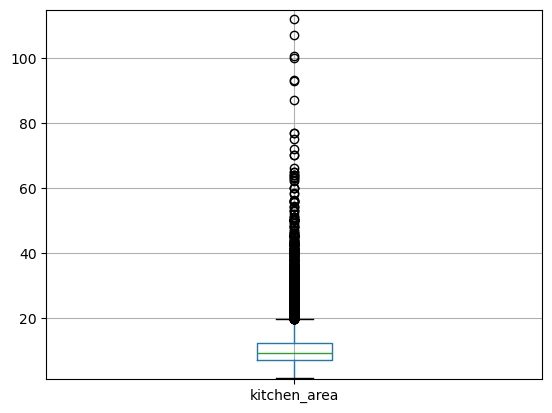

In [60]:
data.boxplot('kitchen_area')
plt.ylim(1,115)

Из графика видим, что в основном размер кухни составляет 10-15 кв.м.

Выведем количество квартир с кухней площадью менее 5 кв.м.

In [61]:
print('Площадь кухни менее 5 кв.м.:', data.query('kitchen_area < 5')['kitchen_area'].count())

Площадь кухни менее 5 кв.м.: 99


99 квартир с площадью кухни менее 5 кв.м, скорее всего это аномалии, либо ошибки. Посмотрим отфильтрованную таблицу.

In [62]:
data.query('kitchen_area < 5').head()

total_images  last_price  total_area first_day_exposition  rooms  \
76              12   2800000.0        55.1  2016-05-14T00:00:00      3   
298              9   2650000.0        42.8  2017-04-25T00:00:00      2   
422              8   1700000.0        55.2  2018-03-24T00:00:00      3   
906             15   2600000.0        27.0  2017-07-10T00:00:00      1   
1327             6   2650000.0        46.2  2016-12-01T00:00:00      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
76              2.60           5.0         38.4      1         False  ...   
298             2.65           5.0         30.0      3         False  ...   
422             2.50           5.0         38.5      5         False  ...   
906             2.75          23.0         18.0     18         False  ...   
1327            2.50           5.0         29.2      5         False  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
76             4.9      0.0          Кировск               NaN   
298            4.5      0.0          Гатчина               NaN   
422            4.5      0.0           Кириши               NaN   
906            2.0      0.0  Санкт-Петербург           22131.0   
1327           4.9      0.0          Гатчина               NaN   

     city_centers_nearest  parks_around_3000  parks_nearest  \
76                    NaN                NaN            NaN   
298                   NaN                NaN            NaN   
422                   NaN                NaN            NaN   
906               17459.0                0.0            NaN   
1327                  NaN                NaN            NaN   

      ponds_around_3000  ponds_nearest  days_exposition  
76                  NaN            NaN            606.0  
298                 NaN            NaN             49.0  
422                 NaN            NaN              NaN  
906                 1.0          411.0             10.0  
1327                NaN            NaN            704.0  

[5 rows x 22 columns]

Проанализировав таблицу, на первый взгляд можно сделать следующий вывод: вместо площади кухни могла быть указана площадь ванной комнаты, так как такие площади несвойственны кухням, но похожи на площади ванных комнат. 

Также проведя ряд математических операций, можно увидеть, что при сложении living_area и kitchen_area остается такой размер площади, который не свойственен площади балкона или площади ванной комнаты.  

На всякий случай проверим логичность данных и по площади кухни в сравнении с общей площадью. Так как в таблице встречались опечатки, посмотрим, есть ли ошибки в 'total_area' и 'kitchen_area'. 'kitchen_area' не должен быть больше 'total_area':

In [63]:
print('Общая площадь меньше площади кухни: ',data.query('total_area < kitchen_area')['kitchen_area'].count())

Общая площадь меньше площади кухни:  0


Вычислим медианное значение площади кухни. 

In [64]:
median_kitchen_area = data.query('kitchen_area > 5')['kitchen_area'].median()

In [65]:
print('Медианное значение площади кухни:', median_kitchen_area)

Медианное значение площади кухни: 9.3


У нас может возникнуть ситуация, что медианное значение площади кухни может логически не соответствовать общей площади. У нас нет пропусков в столбце total_area, значит можем рассмотреть вариант, когда берем отношение медианной площади кухни к медианной общей площади и этим значением заполняем пропуски. Но сначала посмотрим на корреляцию.

In [66]:
print('Коэффициент корреляции Пирсона составляет:', data['total_area'].corr(data['kitchen_area']))

Коэффициент корреляции Пирсона составляет: 0.6183496551318226


Коэффициент не такой высокий, как у living_area, но взаимосвязь наблюдается.

In [67]:
kitchen_area_ratio = median_kitchen_area / median_total_area

In [68]:
print('Отношение медианной площади кухни к медианной общей площади:', kitchen_area_ratio)

Отношение медианной площади кухни к медианной общей площади: 0.17884615384615385


Заполним пропущенные значения kitchen_area_ratio

In [69]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_ratio)

Проверим, остались ли у нас пропущенные значения.

In [70]:
print('Пропущенные значения в столбце kitchen_area:',data['kitchen_area'].isna().sum())

Пропущенные значения в столбце kitchen_area: 0


In [71]:
data = data.loc[(data['kitchen_area'] >= 5)]

Проверим корректность обработки столбца

In [72]:
data['kitchen_area'].describe()

count    22889.000000
mean        10.596413
std          6.040913
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Метод отработал успешно.

#### Заполение `parks_around3000`

Данные столбцов airports_nearest, city_сenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition были добавлены автоматически. Проанализируем некоторые из них.

Проверим столбец parks_around3000 на предмет уникальности значений:

In [73]:
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

Ранее мы считали, что у столбца parks_around3000 есть 5518 пропущенных значений. Пропущенные значения могут означать, что парков в радиусе 3 км нет, заменим их на нулевое значение:

In [74]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

Проверим результат метода:

In [75]:
print('Пропущенные значения в столбце parks_around_3000:',data['parks_around_3000'].isna().sum())

Пропущенные значения в столбце parks_around_3000: 0


Метод сработал. 

#### Заполнение `parks_nearest`  и `ponds_nearest`

Рассмотрим следующий столбец parks_nearest. Есть предположение, что так как данные собирались автоматически, произошел технический сбой, или данные не записались, что повлияло на количество пропущенных значений - 15620. То же самое можно предположить по столбцу ponds_nearest, где пропущено 14589 значений. Оставляем их так, как есть на текущий момент. 

#### Заполнение `ponds_around3000` 

Посмотрим столбец ponds_around3000 на предмет уникальности значений:

In [76]:
data['ponds_around_3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

Ранее мы считали, что у столбца ponds_around3000 есть 5518 пропущенных значений, столько же, сколько и у parks_around3000, что может говорить о технической ошибке, которая привела к пропуску значений в обоих столбцах. Пропущенные значения могут означать, что водоемов в радиусе 3 км нет, заменим их на нулевое значение:

In [77]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

Проверим результат метода:

In [78]:
print('Пропущенные значения в столбце ponds_around_3000:',data['ponds_around_3000'].isna().sum())

Пропущенные значения в столбце ponds_around_3000: 0


#### Заполнение `city_сenters_nearest`  и `airports_nearest`

Столбцы city_сenters_nearest и airports_nearest пока оставлю в том виде, в каком они есть, без добавления пропущенных значений.

#### Заполнение `days_exposition`

В столбце days_exposition содержится 3181 пропущенных значений, так как этот столбец означает, сколько дней было опубликовано объявление до снятия с публикации, можно предположить, что пропущенные значения - это объявления, которые до сих пор размещены.

In [79]:
data['days_exposition'].describe()

count    19776.000000
mean       181.963390
std        220.865267
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что min значение составляет 1 день, значит, вместо пропущенных значений поставим 0. Таким образом, мы будем знать, что 0 в 'days_exposition' будет означать, что объявление все еще висит и квартира не продана.

In [80]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Проверим, получилось ли заполнить данные 0 и остались ли пропуски:

In [81]:
print('Пропущенные значения в days_exposition:', data['days_exposition'].isna().sum())

Пропущенные значения в days_exposition: 0


Мы избавились от NaN, что поможет нам изменить тип данных на следующем шаге.

Посмотрим, как выглядит таблица сейчас после обработки пропущенных значений.

In [82]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5266
city_centers_nearest     5243
parks_around_3000           0
parks_nearest           15003
ponds_around_3000           0
ponds_nearest           14096
days_exposition             0
dtype: int64

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 2.3** Были заполнены пропущенные данные, которые добавлялись вручную. Ряд данных был удален, а именно в 'floors_total', 'locality_name', 'airports_nearest', так как число пропущенных значений не влияло на всю выборку. Был обработан ряд автоматически добавленных значений - airports_nearest, parks_around3000, ponds_around3000 и days_exposition.
    
Возможные причины пропусков данных:
* человеческий фактор. Кто-то мог скрыть информацию о своих квартирах, или сделать опечатку;
* технические проблемы с автоматическим заполнением данных;
* поврежденный файл;
* некорректный ввод данных.

### Изменение типов данных

<div style="border:solid orange 2px; padding: 20px">

Ранее я выделяла проблемы с типами данных у следующих столбцов:

1) first_day_exposition в таблице представлен как object, нам нужно будет отформатировать его в формат даты datetime.

2) floors_total в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

3) is_apartment в таблице представлен как object, нам нужно будет отформатировать его в булев тип.

4) balcony в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

5) parks_around3000 в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

6) ponds_around3000 в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

7) days_exposition в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

8) last_price в таблице представлен как float64, нам нужно отформатировать его в int64, так как это должно быть целое число.

Так как у нас большой объем данных, где нужно поменять тип, использую метод try...except, чтобы понять, где произошла ошибка, если она будет. 

Для того, чтобы сэкономить место, посмотрим, какое максимальное число этажей у нас есть в целом, и при изменении типа данных в 'floors_total','balcony','parks_around3000','ponds_around3000' установим int8 (до 127). Дополнительно проверим  max значения 'floors_total' и 'balcony'.

Проверим max значение для days_exposition и установим int16 (до 65536).

Проверим max значение для last_price и установим int64

In [83]:
data['floors_total'].max()

60.0

In [84]:
data['balcony'].max()

5.0

Подходит int8

In [85]:
data['days_exposition'].max()

1580.0

Подходит int16

In [86]:
data['last_price'].max()

763000000.0

Подходит int64

In [87]:
try:    
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
    print('first_day_exposition_success')
except:
    print('first_day_exposition_error')
    
try:    
    data['floors_total'] =  data['floors_total'].astype('int8')
    print('floors_total_success')
except:
    print('floors_total_error')
    
try:    
    data['is_apartment'] =  data['is_apartment'].astype('bool')
    print('is_apartment_success')
except:
    print('is_apartment_error')
    
try:    
    data['balcony'] =  data['balcony'].astype('int8')
    print('balcony_success')
except:
    print('balcony_error')
    
try:    
    data['parks_around_3000'] =  data['parks_around_3000'].astype('int8')
    print('parks_around_3000_success')
except:
    print('parks_around_3000_error')
    
try:    
    data['ponds_around_3000'] =  data['ponds_around_3000'].astype('int8')
    print('ponds_around_3000_success')
except:
    print('ponds_around_3000_error')
    
try:
    data['days_exposition'] = data['days_exposition'].astype('int16') 
    print('days_exposition_success')
except:
    print('days_exposition_error')
    
try:    
    data['last_price'] =  data['last_price'].astype('int64')
    print('last_price_success')
except:
    print('last_price_error')

first_day_exposition_success
floors_total_success
is_apartment_success
balcony_success
parks_around_3000_success
ponds_around_3000_success
days_exposition_success
last_price_success


Все отработало успешно. Проверим типы данных.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22889 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22889 non-null  int64         
 1   last_price            22889 non-null  int64         
 2   total_area            22889 non-null  float64       
 3   first_day_exposition  22889 non-null  datetime64[ns]
 4   rooms                 22889 non-null  int64         
 5   ceiling_height        22889 non-null  float64       
 6   floors_total          22889 non-null  int8          
 7   living_area           22889 non-null  float64       
 8   floor                 22889 non-null  int64         
 9   is_apartment          22889 non-null  bool          
 10  studio                22889 non-null  bool          
 11  open_plan             22889 non-null  bool          
 12  kitchen_area          22889 non-null  float64       
 13  balcony              

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 2.4** Все необходимые действия по изменению типов данных были успешно совершены. Сейчас будет проще работать с "правильными" данными.  

### Работа с дубликатами

Сейчас у нас только один столбец locality_name имеет стринговый тип данных, проверим его на уникальность значений

In [89]:
print('Количество уникальных значений:', data['locality_name'].nunique())

Количество уникальных значений: 360


Посмотрим, какие есть уникальные значения, чтобы понять, где могут быть дубликаты

In [90]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село

Из представленного списка уникальных значений можем заметить дубликаты: посёлок и поселок, городской поселок и поселок городского типа, повторение названий.

Для начала приведем все к нижнему регистру, чтобы удобнее было искать дубликаты:

In [91]:
data['locality_name'] = data['locality_name'].str.lower()

Заменяем ё на е, садоводческое некоммерческое товарищество, коттеджный поселок, городской поселок, поселок городского типа,садовое товарищество, село, деревня, поселок на пустое значение, так как у нас есть такие дубликаты, как "Мурино" и "поселок Мурино", "Кудрово" и "деревня Кудрово". Также удалим пробелы в названиях населенных пунктов, добавив пробел после \b, чтобы включить этот пробел при удалении дубликатов. 

In [92]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace(r'(садоводческое некоммерческое товарищество|коттеджный поселок|городской поселок|поселок городского типа|садовое товарищество|село|деревня|поселок)\b ', '', regex=True)
)

In [93]:
print('Количество уникальных значений:', data['locality_name'].nunique())

Количество уникальных значений: 304


In [94]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'мурино', 'ломоносов',
       'сертолово', 'петергоф', 'пушкин', 'парголово', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'павловск', 'пикколово', 'всеволожск', 'волхов',
       'кингисепп', 'приозерск', 'сестрорецк', 'куттузи', 'аннино',
       'ефимовский', 'плодовое', 'заклинье', 'торковичи', 'первомайское',
       'красное село', 'понтонный', 'сясьстрой', 'старая', 'лесколово',
       'новый свет', 'сланцы', 'путилово', 'ивангород', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино',
       'романовка', 'бугры', 'рощино', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',
       'александровская', 'лопу

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 2.5** Удалось удалить более 50 дубликатов населенных пунктов, убрав типы населенных пунктов (деревня, село и т.д.), а также произведя замену буквы Ë на Е. 

### Работа с аномалиями

Ранее при работе с пропущенными значениями мы уже сталкивались с аномалиями и обрабатывали их. Сейчас посмотрим те данные, где также могут находиться выбросы и аномальные значения.

Посмотрим распределение значений в данных:

In [95]:
data.describe()

total_images    last_price    total_area  \
count  22889.000000  2.288900e+04  22889.000000   
mean       9.928481  6.633923e+06     61.170885   
min        0.000000  1.219000e+04     20.000000   
25%        6.000000  3.500000e+06     41.000000   
50%       10.000000  4.700000e+06     53.000000   
75%       14.000000  6.850000e+06     70.000000   
max       50.000000  7.630000e+08    900.000000   
std        5.690229  1.104626e+07     35.783483   

                first_day_exposition         rooms  ceiling_height  \
count                          22889  22889.000000    22889.000000   
mean   2017-11-09 12:08:31.477128704      2.103762        2.697434   
min              2014-11-27 00:00:00      0.000000        2.500000   
25%              2017-05-15 00:00:00      1.000000        2.600000   
50%              2017-12-12 00:00:00      2.000000        2.650000   
75%              2018-08-26 00:00:00      3.000000        2.700000   
max              2019-05-03 00:00:00     19.000000        5.000000   
std                              NaN      1.071349        0.216447   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  22889.000000  22889.000000  22889.000000  22889.000000  22889.000000   
mean      10.581808     35.181184      5.832103     10.596413      0.594521   
min        1.000000     14.000000      1.000000      5.000000      0.000000   
25%        5.000000     19.500000      2.000000      7.000000      0.000000   
50%        9.000000     30.400000      4.000000      9.100000      0.000000   
75%       15.000000     42.692308      8.000000     12.000000      1.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   
std        6.525978     22.462255      4.820003      6.040913      0.963910   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17623.000000          17646.000000       22889.000000   
mean       28803.498156          14167.146719           0.474202   
min            0.000000            181.000000           0.000000   
25%        18585.000000           9234.000000           0.000000   
50%        26767.000000          13069.000000           0.000000   
75%        37273.000000          16263.750000           1.000000   
max        84869.000000          65968.000000           3.000000   
std        12582.807803           8598.577509           0.751354   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    7886.000000       22889.000000    8793.000000     22889.000000  
mean      490.148618           0.592512     518.291823       157.215606  
min         1.000000           0.000000      13.000000         0.000000  
25%       288.000000           0.000000     293.000000        22.000000  
50%       455.000000           0.000000     503.000000        74.000000  
75%       612.000000           1.000000     730.000000       199.000000  
max      3190.000000           3.000000    1344.000000      1580.000000  
std       340.380674           0.886773     277.468727       214.563743

#### Аномалии в `total_images`

Данные в total_images выглядят реальными, оставим их так как есть

#### Аномалии в `last_price`

Проанализируем более подробно last_price, из таблицы пока нет понимания по аномалиям.
Посмотрим min и max значения, чтобы построить гистограмму.

In [96]:
print('Максимальное значение last_price:', data['last_price'].max())

Максимальное значение last_price: 763000000


In [97]:
print('Минимальное значение last_price:', data['last_price'].min())

Минимальное значение last_price: 12190


Мы видим, что минимальное значение last_price не соответствует действительности, квартира не может стоит 12190 рублей. Попробуем удалить значения менее 400 тыс. рублей. Стоит учитывать, что объявления от 2017-2018 гг, когда цены на квартиры были меньше. Также в выборке представлены квартиры из сел и деревень, где стоимость квадратного метра гораздо дешевле. Поэтому возьмем за минимум 400 тыс.рублей. 

In [98]:
print('Количество аномальных значений стоимости квартир менее 400 тыс. рублей:', data.query('last_price < 400000')['last_price'].count())

Количество аномальных значений стоимости квартир менее 400 тыс. рублей: 1


In [99]:
data.query('last_price < 400000').head()

total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
8793            2.75            25         32.0     25         False  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
8793          40.5        0  санкт-петербург           36421.0   

     city_centers_nearest  parks_around_3000  parks_nearest  \
8793               9176.0                  1          805.0   

      ponds_around_3000  ponds_nearest  days_exposition  
8793                  0            NaN                8  

[1 rows x 22 columns]

Удалим это значение, так как оно ошибочно, не может квартира в Санкт-Петербурге стоить 12190 рублей. 

In [100]:
data.drop(index=[8793], axis=0, inplace=True)

Проверим, сработал ли метод

In [101]:
data.query('last_price == 12190')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Посмотрим, какое значение сейчас является min

In [102]:
print('Минимальное значение last_price:', data['last_price'].min())

Минимальное значение last_price: 430000


Удалили 1 аномальное значение, все остальные данные на текущий момент являются валидными. Квартиру с максимальной ценой пока оставляем, так как просмотрев предыдущие расчеты, можно сделать вывод, что такая цена может быть оправдана, так как квартира большая и находится в 4 км от центра.   

In [103]:
data.query('last_price == 763000000').head()

total_images  last_price  total_area first_day_exposition  rooms  \
12971            19   763000000       400.0           2017-09-30      7   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
12971            2.65            10        250.0     10         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
12971     71.538462        2  санкт-петербург           25108.0   

      city_centers_nearest  parks_around_3000  parks_nearest  \
12971               3956.0                  1          530.0   

       ponds_around_3000  ponds_nearest  days_exposition  
12971                  3          756.0               33  

[1 rows x 22 columns]

#### Аномалии в `total_area` и `rooms`

Проанализируем данные в total_area. Минимальный разрешенный размер студии по нормам СНиП - 19 м² (14 м² жилая площадь и 5 м² кухня)

In [104]:
print('Количество аномальных значений общей площади квартиры:', data.query('total_area < 19')['total_area'].count())

Количество аномальных значений общей площади квартиры: 0


Данных с общей площадью квартиры менее 19 км.м. нет.

В столбце rooms есть 0 значения, ранее мы считали, что таких комнат 197 и сделали предположение, что они могут являться студиями. Отфильтруем данные исходя из двух условий: квартира содержит 0 комнат и имеет площадь более 44 кв.м.

Согласно СНиП, площадь однокомнатной квартиры должна начинаться от 44 кв.м. 

In [105]:
data.query('(rooms == 0) and (total_area >= 44)')

total_images  last_price  total_area first_day_exposition  rooms  \
3458              6     7400000        73.6           2017-05-18      0   
10008            20     5050000        44.2           2017-09-14      0   
13613            16     8100000        58.4           2019-04-26      0   
19392             5    71000000       371.0           2018-07-26      0   
20082            10    16300000        98.4           2017-11-08      0   
21227             0     8200000        71.0           2017-07-21      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
3458             2.65             3    50.000000      1         False  ...   
10008            2.70             9    32.200000      1         False  ...   
13613            3.30             7    33.000000      6         False  ...   
19392            3.57             7   214.038462      6         False  ...   
20082            3.10             5    60.500000      2         False  ...   
21227            2.65             5    68.000000      5         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
3458      13.163077        0  санкт-петербург           26581.0   
10008      7.905000        0  санкт-петербург           24329.0   
13613     10.444615        0  санкт-петербург           14509.0   
19392     66.351923        0  санкт-петербург           25257.0   
20082     17.598462        0  санкт-петербург           26972.0   
21227     12.698077        0  санкт-петербург           20170.0   

      city_centers_nearest  parks_around_3000  parks_nearest  \
3458                6085.0                  0            NaN   
10008               5955.0                  0            NaN   
13613               8288.0                  0            NaN   
19392               6060.0                  1          761.0   
20082               5819.0                  0            NaN   
21227               1261.0                  2          295.0   

       ponds_around_3000  ponds_nearest  days_exposition  
3458                   1          348.0               60  
10008                  2          520.0               69  
13613                  0            NaN                0  
19392                  1          584.0               90  
20082                  1          674.0              537  
21227                  3          366.0               30  

[6 rows x 22 columns]

Мы видим, что у нас есть 6 значений, где площадь квартиры больше 44 кв.м, но при этом нет комнат. Эти квартиры документально не могут быть студиями, поэтому можно сказать, что они представляют собой некорректные данные. Удалим эти данные из датафрейма. 

In [106]:
data.drop(index=[3458,10008,13613,19392,20082,21227], axis=0, inplace=True)

Проверим работу метода:

In [107]:
data.query('(rooms == 0) and (total_area >= 44)')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

#### Аномалии в `floors_total`

Ранее мы удаляли значения в столбце floors_total. Хочется вернуться к этим данным и проверить их на предмет аномалий. Видно, что максимальное количество этажей в доме, где продается квартира - 60. Это вызывает сомнения, так как в Санкт-Петербурге самый высокий ЖК - это ЖК "Александр Невский", где 35 этажей. Отфильтруем данные и посмотрим их.

In [108]:
data.query('floors_total == 60')

total_images  last_price  total_area first_day_exposition  rooms  \
2253            12     3800000        45.5           2018-06-28      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
2253            2.88            60         27.4      4         False  ...   

      kitchen_area  balcony  locality_name  airports_nearest  \
2253           7.4        0      кронштадт           67763.0   

     city_centers_nearest  parks_around_3000  parks_nearest  \
2253              49488.0                  2          342.0   

      ponds_around_3000  ponds_nearest  days_exposition  
2253                  3          614.0              166  

[1 rows x 22 columns]

Из таблицы видно, что 60-этажный дом находится в Кронштаде, чего не может быть в реальности, так как максимальная этажность домов в Кронштаде - до 15 этажей. Еще попробуем отфильтровать данные и поставить значения этажей выше 35, что поможет сделать данные более реальными.

In [109]:
data.query('floors_total > 35')

total_images  last_price  total_area first_day_exposition  rooms  \
397              15     5990000        54.0           2018-03-22      2   
2253             12     3800000        45.5           2018-06-28      2   
5807             17     8150000        80.0           2019-01-09      2   
11079            16     9200000        75.0           2019-02-22      2   
16934             5     4100000        40.0           2017-10-17      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
397              2.65            36         21.4     28         False  ...   
2253             2.88            60         27.4      4         False  ...   
5807             2.70            36         41.0     13         False  ...   
11079            2.70            36         40.0     29         False  ...   
16934            2.65            37         17.4      5         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
397           18.70        1  санкт-петербург           18732.0   
2253           7.40        0        кронштадт           67763.0   
5807          12.00        5  санкт-петербург           18732.0   
11079         12.00        2  санкт-петербург           18732.0   
16934          8.34        0  санкт-петербург           18732.0   

      city_centers_nearest  parks_around_3000  parks_nearest  \
397                20444.0                  0            NaN   
2253               49488.0                  2          342.0   
5807               20444.0                  0            NaN   
11079              20444.0                  0            NaN   
16934              20444.0                  0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
397                    3           80.0               11  
2253                   3          614.0              166  
5807                   3           80.0               38  
11079                  3           80.0                0  
16934                  3           80.0               71  

[5 rows x 22 columns]

Удалим эти значения, так как количество этажей выглядит неправдоподобно.

In [110]:
data.drop(index=[397,2253,5807,11079,16934], axis=0, inplace=True)

Проверим работу метода

In [111]:
data.query('floors_total > 35')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Метод отработал успешно

#### Аномалии в `floor`

Рассмотрим на предмет аномалий столбец floor. Нужно будет проверить, сходится ли количество этажей в доме с этажностью квартиры.

In [112]:
data = data.rename(columns = {'floor': 'floors'})

In [113]:
print('Количество квартир, у которых этаж не совпадает с общей этажностью дома: ', data.query('floors_total < floors')['floors_total'].count())

Количество квартир, у которых этаж не совпадает с общей этажностью дома:  0


Аномалии не найдены. 

#### Аномалии в `airports_nearest`

Проверим столбец airports_nearest на предмет аномалий и возможности заполнения пропущенных значений:

In [114]:
data['airports_nearest'].describe()

count    17611.000000
mean     28805.128499
std      12581.901803
min          0.000000
25%      18585.000000
50%      26770.000000
75%      37276.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В представленных данных видим, что минимальное расстояние до ближайшего аэропорта - 0 м, чего не может быть. Жилые помещения (кроме приаэропортных гостиниц) не должны находиться в пределах аэропорта. Посмотрим, сколько таких аномальных значений есть еще в данных.

In [115]:
data.query('airports_nearest == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
21085             0     7000000        34.7           2018-09-23      1   

       ceiling_height  floors_total  living_area  floors  is_apartment  ...  \
21085             2.7             9         19.8       3         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
21085           6.0        2  санкт-петербург               0.0   

      city_centers_nearest  parks_around_3000  parks_nearest  \
21085              22801.0                  0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
21085                  0            NaN               60  

[1 rows x 22 columns]

Удалим это значение, так как оно единственное и на выборке никак не отразится с помощью метода drop по индексу с обновлением текущего датафрейма:

In [116]:
data.drop(index=[21085], axis=0, inplace=True)

Проверим, сработал ли метод

In [117]:
data.query('airports_nearest == 0')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floors, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Посмотрим, какое значение сейчас является min

In [118]:
print('Минимальное расстояние до ближайшего аэропорта в метрах:', data['airports_nearest'].min())

Минимальное расстояние до ближайшего аэропорта в метрах: 6450.0


6,45 км до ближайшего аэропорта - это уже больше похоже на реальные данные. Пока оставлю эти данные в таком виде.

#### Аномалии в `balcony`

Ранее мы удаляли пропущенные данные в столбце balcony. В советский период строили панельные дома с 5-ю балконами.  Но пока оставлю этот столбец таким, какой он есть. 

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22876 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22876 non-null  int64         
 1   last_price            22876 non-null  int64         
 2   total_area            22876 non-null  float64       
 3   first_day_exposition  22876 non-null  datetime64[ns]
 4   rooms                 22876 non-null  int64         
 5   ceiling_height        22876 non-null  float64       
 6   floors_total          22876 non-null  int8          
 7   living_area           22876 non-null  float64       
 8   floors                22876 non-null  int64         
 9   is_apartment          22876 non-null  bool          
 10  studio                22876 non-null  bool          
 11  open_plan             22876 non-null  bool          
 12  kitchen_area          22876 non-null  float64       
 13  balcony              

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 2.6** В рамках данного пункта были дополнительно рассмотрены аномалии у столбцов, с которыми ранее проходила работа и у столбцов, с которыми еще не работали. 
    
Аномалии были выявлены и удалены в нескольких столбцах: last_price, total_area, rooms, floor. 

<div style="border:solid blue 2px; padding: 20px">
    
## Вывод по разделу 2. <a class="tocSkip">
    
Была проведена большая работа практически со всеми данными в 22-х столбцах датафрейма. 
    
1) Было проведено изменение названий столбцов на корректные cityCenters_nearest -> city_centers_nearest, parks_around3000-> parks_around_3000 и ponds_around3000-> ponds_around_3000
    
2) Были выявлены следующее количество пропущенных значений:
* ceiling_height           9195
* floors_total               86
* living_area              1903
* is_apartment            20924
* kitchen_area             2278
* balcony                 11519
* locality_name              49
* airports_nearest         5542
* city_centers_nearest     5519
* parks_around3000         5518
* parks_nearest           15620
* ponds_around3000         5518
* ponds_nearest           14589
* days_exposition          3181
    
3) В итоге были удалены пропущенные значения, если их было мало и это не повлияло бы на выборку, либо заменены на медианные значения или 0.

Значения были удалены в:
* floors_total
* locality_name
    
Значения были заменены на 0:
* balcony
* days_exposition
* parks_around3000
* ponds_around3000
    
Значения были заменены на медианные:
* ceiling_height
* living_area
* kitchen_area
 
4) Ранее было в выборке 23699, после обработки стало 22876. 
    
5) Был изменен тип данных у 8 столбцов на корректный:
* first_day_exposition
* floors_total
* is_apartment
* balcony
* parks_around3000
* ponds_around3000
* days_exposition
* last_price
    
6) Выявлено и удалено более 50 дубликатов населенных пунктов
    
7) Аномальные значения были выявлены и удалены в следующих столбцах:
* last_price
* total_area
* rooms
* floor
* airports_nearest
* parks_nearest
    
8) Причинами искажений данных могли стать следующие причины:
* человеческий фактор. Кто-то мог скрыть информацию о своих квартирах, или сделать опечатку;
* технические проблемы с автоматическим заполнением данных;
* поврежденный файл;
* некорректный ввод данных.

## Добавляю в таблицу новые столбцы

### Цена одного квадратного метра 

Добавляем столбец с ценой одного квадратного метра data['per_sqm_price']:

In [120]:
data['per_sqm_price'] = data['last_price'] / data['total_area']

Проверим, появился ли столбец

In [121]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floors  is_apartment  ...  \
0            2.70            16    51.000000       8         False  ...   
1            2.65            11    18.600000       1         False  ...   
2            2.65             5    34.300000       4         False  ...   
3            2.65            14    91.730769       9         False  ...   
4            3.03            14    32.000000      13         False  ...   

   balcony    locality_name  airports_nearest  city_centers_nearest  \
0        0  санкт-петербург           18863.0               16028.0   
1        2           шушары           12817.0               18603.0   
2        0  санкт-петербург           21741.0               13933.0   
3        0  санкт-петербург           28098.0                6800.0   
4        0  санкт-петербург           31856.0                8098.0   

  parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                 1          482.0                  2          755.0   
1                 0            NaN                  0            NaN   
2                 1           90.0                  2          574.0   
3                 2           84.0                  3          234.0   
4                 2          112.0                  1           48.0   

   days_exposition  per_sqm_price  
0                0  120370.370370  
1               81   82920.792079  
2              558   92785.714286  
3              424  408176.100629  
4              121  100000.000000  

[5 rows x 23 columns]

Новый столбец per_sqm_price появился в датафрейме.

### День недели, месяц, год

Извлекаем из поля first_day_exposition день недели data['first_exposition_day_of_week'], месяц data['first_exposition_month'] и год публикации объявления data['first_exposition_year'] и создаем соответствующие столбцы.

In [122]:
data['first_exposition_day_of_week'] = data['first_day_exposition'].dt.weekday

In [123]:
data['first_exposition_month'] = data['first_day_exposition'].dt.month

In [124]:
data['first_exposition_year'] = data['first_day_exposition'].dt.year

Проверим, появились ли столбцы

In [125]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floors  is_apartment  ...  \
0            2.70            16    51.000000       8         False  ...   
1            2.65            11    18.600000       1         False  ...   
2            2.65             5    34.300000       4         False  ...   
3            2.65            14    91.730769       9         False  ...   
4            3.03            14    32.000000      13         False  ...   

   city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0               16028.0                  1          482.0                  2   
1               18603.0                  0            NaN                  0   
2               13933.0                  1           90.0                  2   
3                6800.0                  2           84.0                  3   
4                8098.0                  2          112.0                  1   

  ponds_nearest  days_exposition  per_sqm_price  first_exposition_day_of_week  \
0         755.0                0  120370.370370                             3   
1           NaN               81   82920.792079                             1   
2         574.0              558   92785.714286                             3   
3         234.0              424  408176.100629                             4   
4          48.0              121  100000.000000                             1   

   first_exposition_month  first_exposition_year  
0                       3                   2019  
1                      12                   2018  
2                       8                   2015  
3                       7                   2015  
4                       6                   2018  

[5 rows x 26 columns]

Новые столбцы были добавлены.

### Тип этажа

Создаем столбец с типом этажа квартиры: «первый», «последний», «другой» при помощи функции.

In [126]:
def type_floor(row):
    floor = row['floors']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total:
        return 'последний'
    return 'другой'

In [127]:
data['type_floor'] = data.apply(type_floor, axis =1)

Создадим дополнительную переменную с типом этажа, но только в числовом формате для дальнейших вычислений:

In [128]:
def type_floor_num(row):
    floor = row['floors']
    total = row['floors_total']
    if floor == 1:
        return 1
    if floor == total:
        return 3
    return 2

In [129]:
data['type_floor_num'] = data.apply(type_floor_num, axis =1)

Сделаем проверку функции через query

In [130]:
data.query('type_floor == "другой"')

total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
5                10     2890000       30.40           2018-09-10      1   
...             ...         ...         ...                  ...    ...   
23692             2     1350000       30.00           2017-07-07      1   
23693             9     4600000       62.40           2016-08-05      3   
23694             9     9700000      133.81           2017-03-21      3   
23695            14     3100000       59.00           2018-01-15      3   
23697            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floors  is_apartment  ...  \
0                2.70            16    51.000000       8         False  ...   
2                2.65             5    34.300000       4         False  ...   
3                2.65            14    91.730769       9         False  ...   
4                3.03            14    32.000000      13         False  ...   
5                2.65            12    14.400000       5         False  ...   
...               ...           ...          ...     ...           ...  ...   
23692            2.65             5    17.500000       4         False  ...   
23693            2.60             9    40.000000       8         False  ...   
23694            3.70             5    73.300000       3         False  ...   
23695            2.65             5    38.000000       4         False  ...   
23697            3.00            17    44.278846      12         False  ...   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
0              482.0                  2          755.0                0   
2               90.0                  2          574.0              558   
3               84.0                  3          234.0              424   
4              112.0                  1           48.0              121   
5                NaN                  0            NaN               55   
...              ...                ...            ...              ...   
23692            NaN                  0            NaN              413   
23693          352.0                  1          675.0              239   
23694          796.0                  3          381.0                0   
23695            NaN                  0            NaN               45   
23697          173.0                  3          196.0              602   

       per_sqm_price  first_exposition_day_of_week  first_exposition_month  \
0      120370.370370                             3                       3   
2       92785.714286                             3                       8   
3      408176.100629                             4                       7   
4      100000.000000                             1                       6   
5       95065.789474                             0                       9   
...              ...                           ...                     ...   
23692   45000.000000                             4                       7   
23693   73717.948718                             4                       8   
23694   72490.845228                             1                       3   
23695   52542.372881                             0                       1   
23697  149511.400651                             1                       3   

       first_exposition_year  type_floor  type_floor_num  
0                       2019      другой               2  
2                       2015      другой               2  
3                       2015      другой               2  
4                       2018      другой               2  
5                       

Функция отработала успешно.

### Расстояние до центра города в км

Добавим столбец с расстоянием до центра города в километрах (переведя из м в км и округляя до ближайших целых значений). Изменим тип данных на int, так как нужно целое число.

Однако, чтобы перевести в int, нужно избавиться от NaN.

Проанализируем этот столбец.

In [131]:
data['city_centers_nearest'].describe()

count    17633.000000
mean     14166.435774
std       8595.236810
min        181.000000
25%       9234.000000
50%      13072.000000
75%      16254.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Из описания мы видим, что минимальное значение расстояния до центра равно 1,81 км и максимальное 61,4 км. 11,3 км - это медиана. Так как 0 заполнять расстояние будет нецелесообразно, заполним пропущенные данные медианой.

In [132]:
median_dist_to_city = data['city_centers_nearest'].median()

In [133]:
print('Медианное расстояние до центра составляет', median_dist_to_city)

Медианное расстояние до центра составляет 13072.0


In [134]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(median_dist_to_city)

Проверим, как отработал метод

In [135]:
print('Пропущенные значения в столбце city_centers_nearest:',data['city_centers_nearest'].isna().sum())

Пропущенные значения в столбце city_centers_nearest: 0


Переведем в км и установим тип данных int16

In [136]:
data['to_center_km'] = (data['city_centers_nearest'] / 1000).round(0).astype('int16')

Проверим, как сработали методы

In [137]:
data['to_center_km'].unique()

array([16, 19, 14,  7,  8, 13, 12, 15, 52, 33, 31, 11, 10,  2, 32,  4, 17,
       30,  5, 51, 50, 24, 18,  9, 28,  3,  6, 27, 21, 49, 35, 36, 34,  1,
       29, 26, 53, 22, 55, 23, 25,  0, 20, 66, 47, 40, 57, 37, 41, 43, 48,
       62, 39, 65, 54, 42, 59, 45, 61, 63, 60], dtype=int16)

 Проверим, появился ли столбец в датафрейме

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22876 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  22876 non-null  int64         
 1   last_price                    22876 non-null  int64         
 2   total_area                    22876 non-null  float64       
 3   first_day_exposition          22876 non-null  datetime64[ns]
 4   rooms                         22876 non-null  int64         
 5   ceiling_height                22876 non-null  float64       
 6   floors_total                  22876 non-null  int8          
 7   living_area                   22876 non-null  float64       
 8   floors                        22876 non-null  int64         
 9   is_apartment                  22876 non-null  bool          
 10  studio                        22876 non-null  bool          
 11  open_plan                     228

<div style="border:solid blue 2px; padding: 20px">
    
## Вывод по разделу 3. <a class="tocSkip">

В ходе работы были добавлены новые столбцы, которые на следущем шаге помогут рассчитать, какие квартиры продаются лучше, а какие нет. 
    
Были добавлены следующе данные:
* цена одного квадратного метра 
* день недели публикации объявления 
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры («первый», «последний», «другой»)
* расстояние до центра города в километрах 
    
Также был изменен тип данных city_centers_nearest с float64 на int16 ввиду перевода в целочисленные значения.

## Исследовательский анализ данных

### Изучение списка параметров

#### Параметр total_area

Проанализируем более детально параметр total_area. Создадим диаграмму размаха, min - 20, max - 900.

In [139]:
data['total_area'].describe()

count    22876.000000
mean        61.155167
std         35.731178
min         20.000000
25%         41.000000
50%         53.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Диаграмма размаха общей площади квартиры


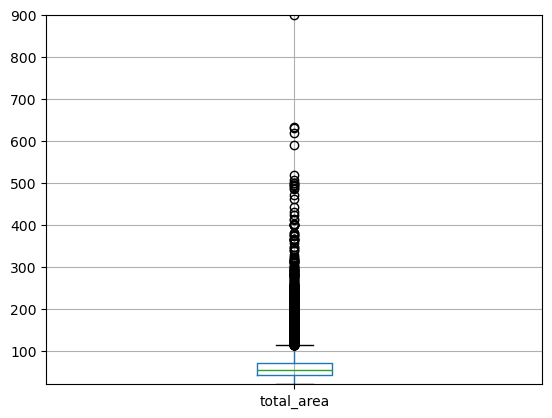

In [140]:
print('Диаграмма размаха общей площади квартиры')
data.boxplot('total_area')
plt.ylim(20,900)
plt.show()

Все, что находится за "усами" - выбросы, обозначенные точками. Посчитаем длину усов, чтобы корректно посчитать выбросы.

In [141]:
q1 = data['total_area'].quantile(q=0.25)
q3 = data['total_area'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

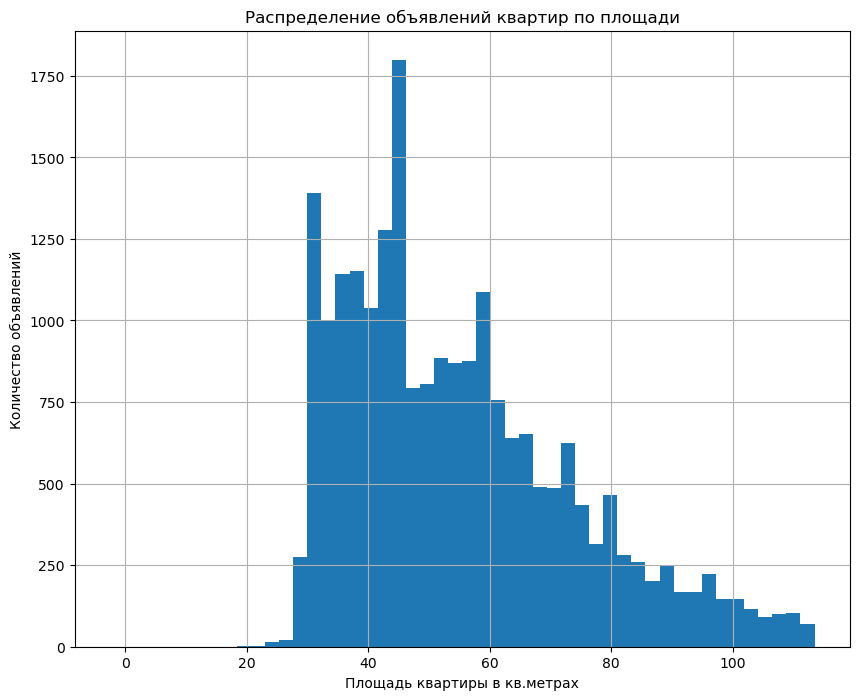

In [142]:
data['total_area'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по площади')
plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Во время чистки было удалено 1269 выбросов, максимальная площадь продаваемых квартир стала составлять 113,5 кв.м.
    
Как видим из гистограммы, большая часть объявлений содержит рекламу о продаже квартир от 30 кв.м до 60 кв.м. Обычно такие квартиры продаются быстрее, чем бОльшие по размеру, и их всегда больше в количестве.
    
Удаление выбросов помогло детальнее рассмотреть основную массу данных и сделать гипотезу о том, что предложения на квартиры от 30 кв.м до 60 кв.м. больше. 

#### Параметр living_area

Проанализируем более подробно параметр living_area, построив диаграмму размаха (min - 14, max - 409 ) 

In [143]:
data['living_area'].describe()

count    22876.000000
mean        35.172468
std         22.434744
min         14.000000
25%         19.500000
50%         30.400000
75%         42.692308
max        409.700000
Name: living_area, dtype: float64

Диаграмма размаха жилой площади квартиры


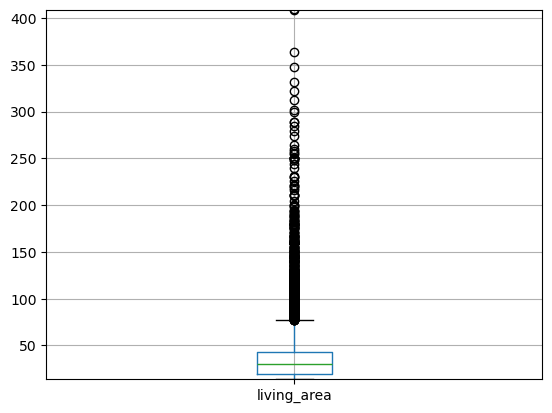

In [144]:
print('Диаграмма размаха жилой площади квартиры')
data.boxplot('living_area')
plt.ylim(14,409)
plt.show()

Все, что находится за "усами" - выбросы, обозначенные точками. Посчитаем длину усов, чтобы корректно посчитать выбросы.

In [145]:
q1 = data['living_area'].quantile(q=0.25)
q3 = data['living_area'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

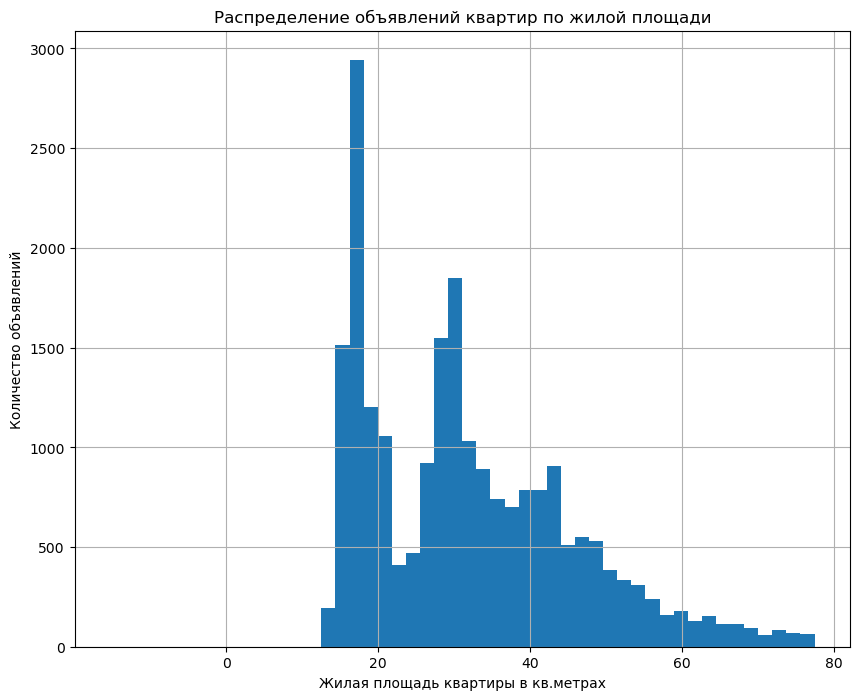

In [146]:
data['living_area'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по жилой площади')
plt.xlabel('Жилая площадь квартиры в кв.метрах')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Во время чистки было удалено 120 выбросов, максимальная жилая площадь продаваемых квартир стала составлять 72 кв.м.
    
Как видим из гистограммы, большая часть объявлений содержит рекламу о продаже квартир с жилой площадью от 14 кв.м до 30 кв.м. 

#### Параметр kitchen_area

Проанализируем более подробно параметр kitchen_area, построив диаграмму размаха (min - 5, max - 112 ) 

In [147]:
data['kitchen_area'].describe()

count    22876.000000
mean        10.592245
std          6.027502
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Диаграмма размаха площади кухни


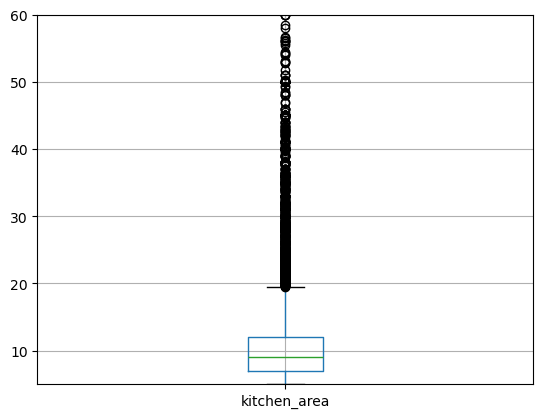

In [148]:
print('Диаграмма размаха площади кухни')
data.boxplot('kitchen_area')
plt.ylim(5,60)
plt.show()

Все, что находится за "усами" - выбросы, обозначенные точками. Посчитаем длину усов, чтобы корректно посчитать выбросы.

In [149]:
q1 = data['kitchen_area'].quantile(q=0.25)
q3 = data['kitchen_area'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

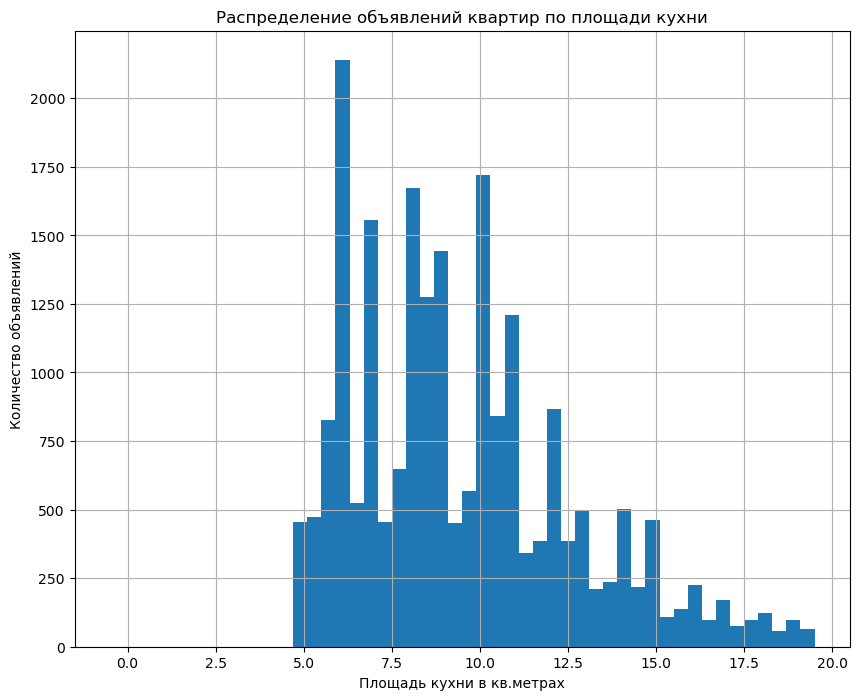

In [150]:
data['kitchen_area'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по площади кухни')
plt.xlabel('Площадь кухни в кв.метрах')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
   
Как видим из гистограммы, большая часть объявлений содержит рекламу о продаже квартир с площадью кухни от 5,5 до 12 кв.м. Самые повторяющиеся объявления с кухнями 5,5, 8 и 10 кв.м. 

#### Параметр last_price

Проанализируем более подробно параметр last_price, построив диаграмму размаха (min - 430 тыс.руб, max - 763 млн.руб  ) 

In [151]:
data['last_price'].describe()

count    2.287600e+04
mean     6.630948e+06
std      1.104086e+07
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Диаграмма размаха стоимости квартиры


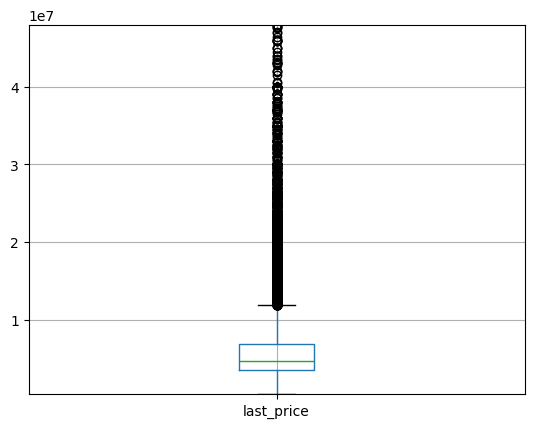

In [152]:
print('Диаграмма размаха стоимости квартиры')
data.boxplot('last_price')
plt.ylim(430000,48000000)
plt.show()

Все, что находится за "усами" - выбросы, обозначенные точками. Посчитаем длину усов, чтобы корректно посчитать выбросы.

In [153]:
q1 = data['last_price'].quantile(q=0.25)
q3 = data['last_price'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

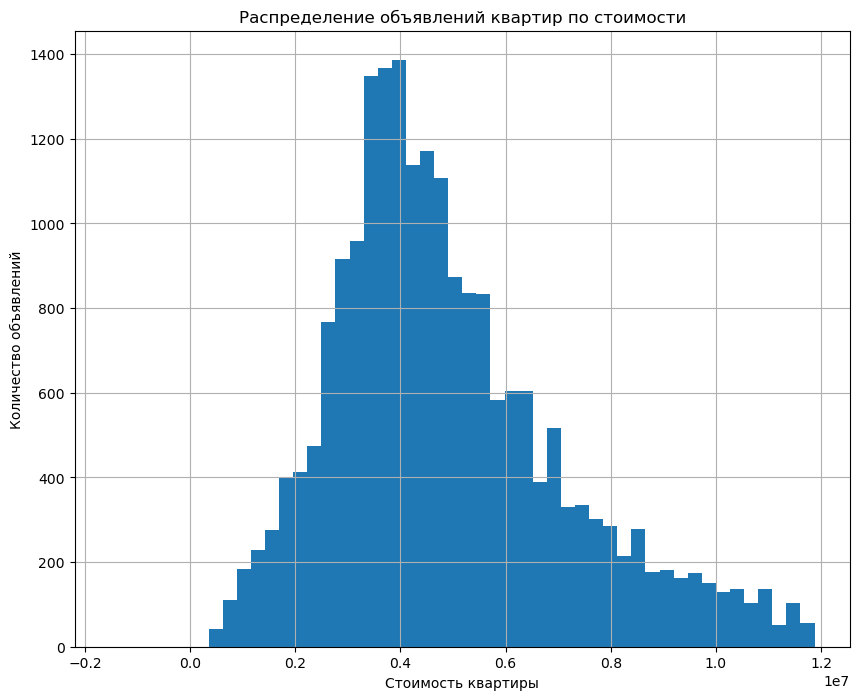

In [154]:
data['last_price'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по стоимости')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Во время чистки было удалено 1127 выбросов, максимальная стоимость квартиры стала составлять 9,9 млн руб.
    
Как видим из гистограммы, максимальная стоимость квартиры стала 12 млн руб, вместо 9,9 млн руб. БОльшая часть квартир стоит в диапазоне от 3,5 млн до 6 млн рублей. Медианная стоимость квартир - 4,7 млн рублей.

#### Параметр rooms

Проанализируем более подробно параметр rooms, построив диаграмму размаха (min - 0 комнат, max - 19 комнат  ) 

In [155]:
data['rooms'].describe()

count    22876.000000
mean         2.104433
std          1.071060
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Диаграмма размаха количества квартир


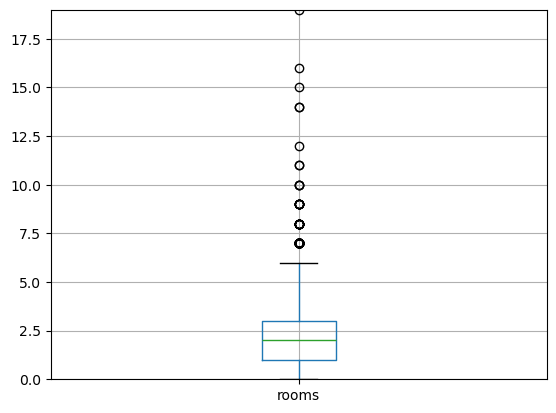

In [156]:
print('Диаграмма размаха количества квартир')
data.boxplot('rooms')
plt.ylim(0,19)
plt.show()

In [157]:
q1 = data['rooms'].quantile(q=0.25)
q3 = data['rooms'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

Выведу график со обновленными значениями.

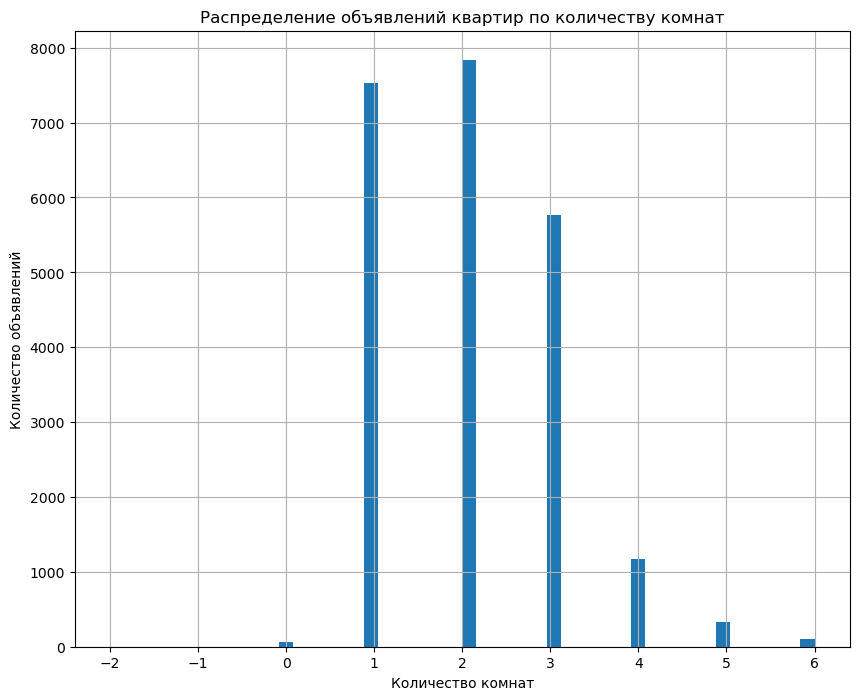

In [158]:
data['rooms'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Видим, что аномалии все-таки есть, например, в выборке попадаются квартиры с 19-ю комнатами. Пока оставим их и выведем график без аномалий.

Как видим из гистограммы, самые продаваемые квартиры имеют 1-2 комнаты. 

#### Параметр ceiling_height

Проанализируем более подробно параметр ceiling_height, построив диаграмму размаха (min - 2,5 м, max - 5 м) 

In [159]:
data['ceiling_height'].describe()

count    22876.000000
mean         2.697349
std          0.216374
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Диаграмма размаха высоты потолков


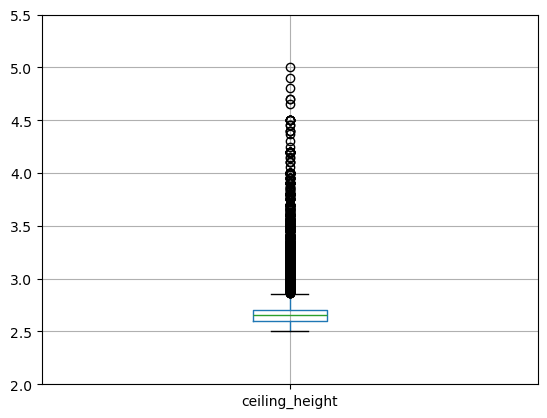

In [160]:
print('Диаграмма размаха высоты потолков')
data.boxplot('ceiling_height')
plt.ylim(2,5.5)
plt.show()

In [161]:
q1 = data['ceiling_height'].quantile(q=0.25)
q3 = data['ceiling_height'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

Выведу график со обновленными значениями.

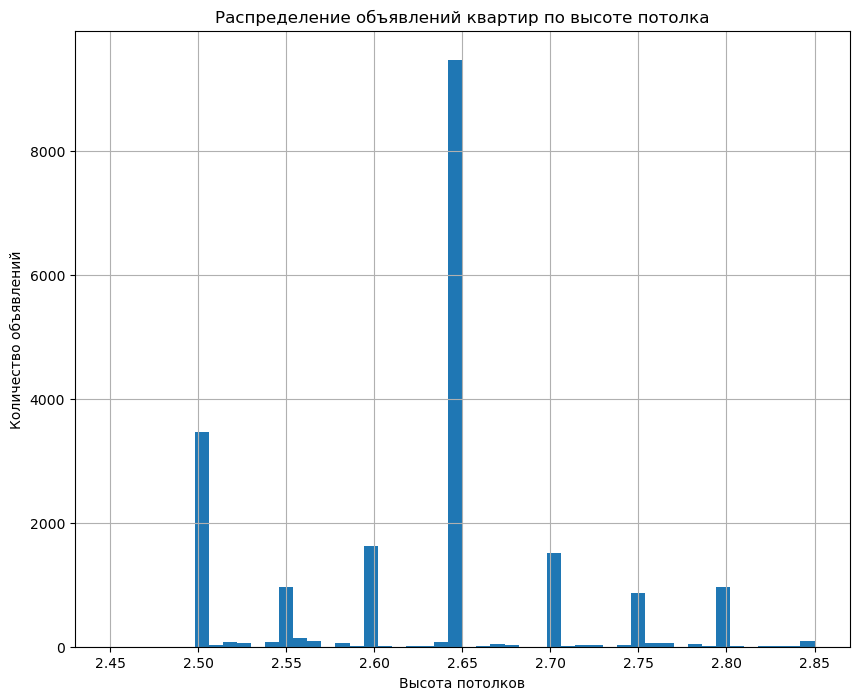

In [162]:
data['ceiling_height'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по высоте потолка')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Как видим из гистограммы, самые продаваемые квартиры были с высотой потолка 2.65 м.

#### Параметр type_floor

Проанализируем более подробно параметр type_floor

In [163]:
data['type_floor'].value_counts()

type_floor
другой       16813
последний     3250
первый        2813
Name: count, dtype: int64

Мы видим, что распределение квартир на первом и последних этажах распределилось равномерно. Большая часть квартир находится на других этажах, для наглядности составим гистрограмму.

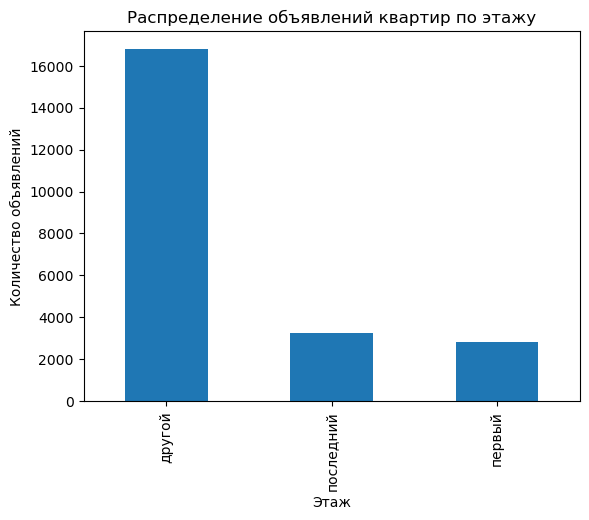

In [164]:
data['type_floor'].value_counts().plot(kind='bar',title='Распределение объявлений квартир по этажу')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
В параметре type_floor не смотрели выбросы, данные выглядят реальными. Квартиры на первом и последнем этажах рапсределены равномерно и бОльшую часть выборки составляют квартиры, размещенные на других этажах. 

#### Параметр floors_total

Проанализируем более подробно параметр floors_total, построив диаграмму размаха (min - 1 этаж, max - 35 этаж) 

In [165]:
data['floors_total'].describe()

count    22876.0000
mean        10.5758
std          6.5096
min          1.0000
25%          5.0000
50%          9.0000
75%         15.0000
max         35.0000
Name: floors_total, dtype: float64

Диаграмма размаха количества этажей в домах


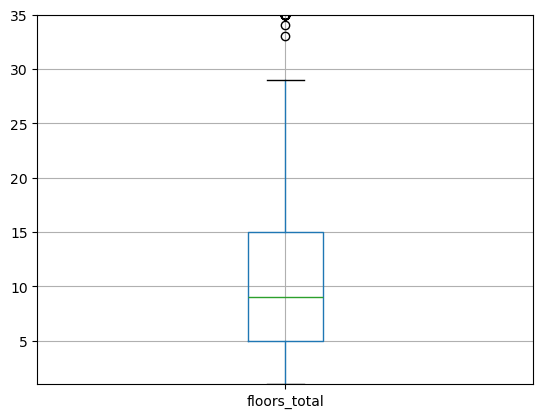

In [166]:
print('Диаграмма размаха количества этажей в домах')
data.boxplot('floors_total')
plt.ylim(1,35)
plt.show()

Все, что находится за "усами" - выбросы, обозначенные точками. Посчитаем длину усов, чтобы корректно посчитать выбросы.

In [167]:
q1 = data['floors_total'].quantile(q=0.25)
q3 = data['floors_total'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

data = data.loc[(data['floors_total'] >= down_whisker) & (data['floors_total'] <= up_whisker)]

Проверим, как прошла очистка от выбросов с помощью функции max()

In [168]:
data['floors_total'].max()

29

Сейчас max значение количества этажей в доме - 29. Посмотрим, сколько выбросов было удалено в количественном значении:

In [169]:
print('Количество удаленных выбросов:',  22876 - len(data))

Количество удаленных выбросов: 24


Выбросы удалились, построим гистограмму для анализа с данными в порядке возрастания.

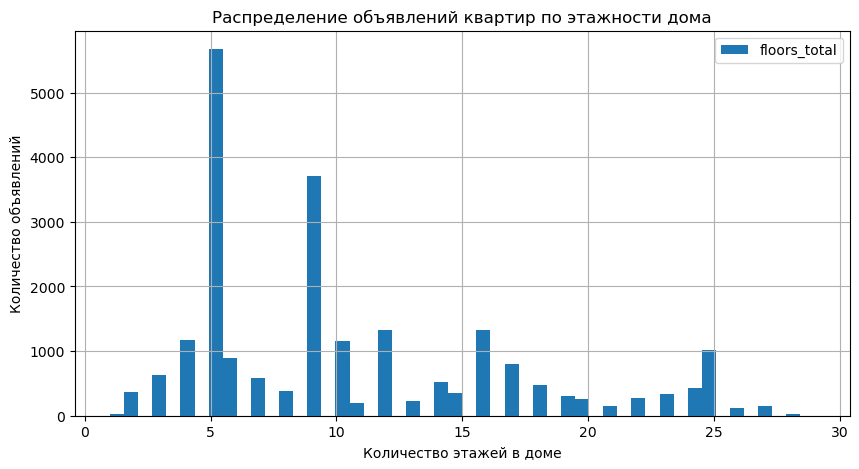

In [170]:
data.sort_values(by='floors_total', ascending=True).plot(kind='hist', y='floors_total',title='Распределение объявлений квартир по этажности дома',bins=50, figsize=(10,5), grid=True)

plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Во время чистки было удалено 24 выброса.

Как видим из гистограммы, самые продаваемые квартиры находятся в домах 5-9-этажности, т.е.в домах средней этажности и в многоэтажных жилых домах.  

#### Параметр city_centers_nearest

Проанализируем более подробно параметр city_centers_nearest, построив диаграмму размаха (min - 181 метров, max - 65 тыс. м) 

In [171]:
data['city_centers_nearest'].describe()

count    22852.000000
mean     13908.752232
std       7561.218526
min        181.000000
25%      10890.000000
50%      13072.000000
75%      15224.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Диаграмма размаха расстояния до центра города


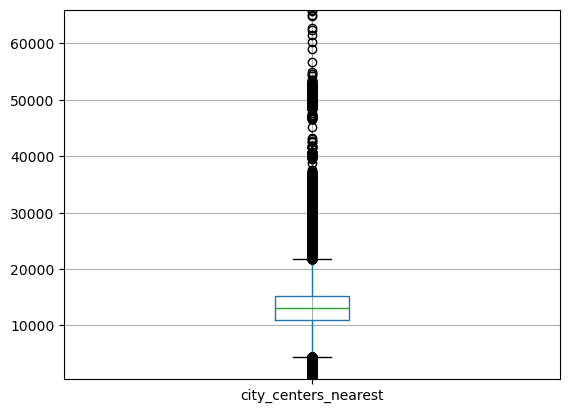

In [172]:
print('Диаграмма размаха расстояния до центра города')
data.boxplot('city_centers_nearest')
plt.ylim(467,66000)
plt.show()

Все, что находится за "усами" - выбросы, обозначенные точками. Посчитаем длину усов, чтобы корректно посчитать выбросы.

In [173]:
q1 = data['city_centers_nearest'].quantile(q=0.25)
q3 = data['city_centers_nearest'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

Выведу график со обновленными значениями.

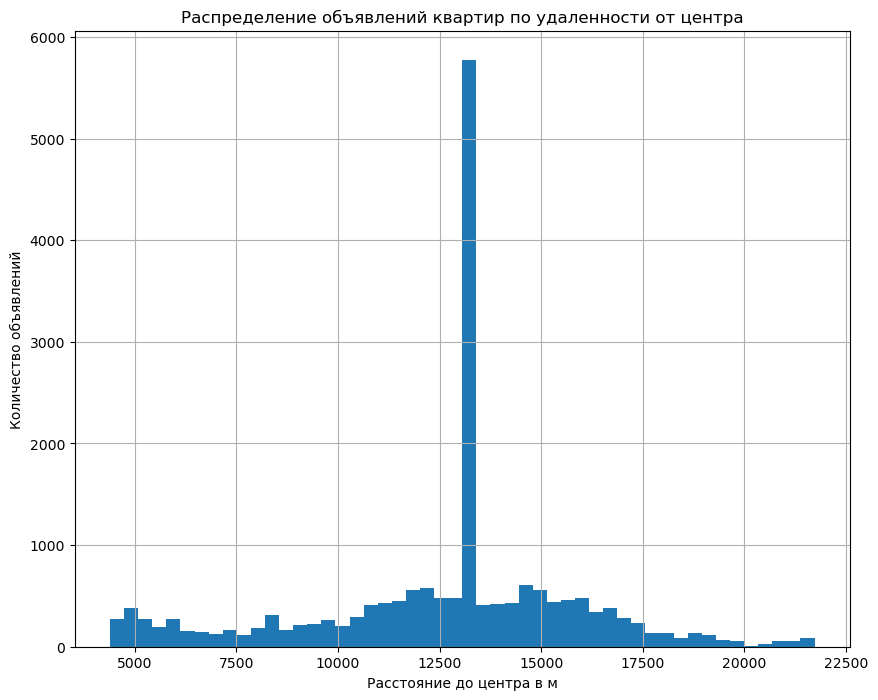

In [174]:
data['city_centers_nearest'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по удаленности от центра')
plt.xlabel('Расстояние до центра в м')
plt.ylabel('Количество объявлений')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
Как видим из гистограммы, самые продаваемые квартиры находились на расстоянии 13 км от центра, самое минимальное расстояние до центра в районе 3 км.

#### Параметр parks_nearest

Посмотрим параметр parks_nearest

In [175]:
data['parks_nearest'].describe()

count    7880.000000
mean      490.087690
std       340.461644
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [176]:
data.isna().sum().sort_values(ascending=False)

parks_nearest                   14972
ponds_nearest                   14093
airports_nearest                 5266
total_images                        0
type_floor_num                      0
type_floor                          0
first_exposition_year               0
first_exposition_month              0
first_exposition_day_of_week        0
per_sqm_price                       0
days_exposition                     0
ponds_around_3000                   0
parks_around_3000                   0
city_centers_nearest                0
locality_name                       0
last_price                          0
balcony                             0
kitchen_area                        0
open_plan                           0
studio                              0
is_apartment                        0
floors                              0
living_area                         0
floors_total                        0
ceiling_height                      0
rooms                               0
first_day_ex

<div style="border:solid orange 2px; padding: 20px">
    
Оставляем параметр parks_nearest как есть, так как пока невозможно заполнить пропущенные данные. 

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 4.1.** Сейчас у нас осталось 22852 значения во всей выборке.

При работе с параметрами мы оставляли данные и смотрели данные без выбросов и аномалий на графиках, во время всей работы было удалено только 24 значения.

Работа с графиками помогла выявить следующие тенденции по продаже квартир: в основном в продаже находились 1-2-х комнатные квартиры с площадью от 30 до 60 кв.м. с жилой площадью от 14 кв.м до 30 кв.м., с кухней от 5,5 до 10 кв.м. стоимостью от 3,5 до 6 млн рублей. Высота потолка в таких квартирах - 2,65 м, а квартиры находятся в 5-9-этажных домах на расстоянии 13 км от центра.

###  Анализ days_exposition

Анализируем, как быстро продавались квартиры. Для начала посмотрим этот параметр детальнее.

In [177]:
data['days_exposition'].describe()

count    22852.000000
mean       157.266104
std        214.634321
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Ранее минимальное значение продажи составляло 1 день до того, как мы зполнили 0 пропущенные значения. Поэтому отфильтруем только те значения, где нет 0.

In [178]:
data = data.loc[data['days_exposition'] > 0]

In [179]:
data

total_images  last_price  total_area first_day_exposition  rooms  \
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
5                10     2890000       30.40           2018-09-10      1   
...             ...         ...         ...                  ...    ...   
23691            11     9470000       72.90           2016-10-13      2   
23692             2     1350000       30.00           2017-07-07      1   
23693             9     4600000       62.40           2016-08-05      3   
23695            14     3100000       59.00           2018-01-15      3   
23697            13    11475000       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floors  is_apartment  ...  \
1                2.65            11    18.600000       1         False  ...   
2                2.65             5    34.300000       4         False  ...   
3                2.65            14    91.730769       9         False  ...   
4                3.03            14    32.000000      13         False  ...   
5                2.65            12    14.400000       5         False  ...   
...               ...           ...          ...     ...           ...  ...   
23691            2.75            25    40.300000       7         False  ...   
23692            2.65             5    17.500000       4         False  ...   
23693            2.60             9    40.000000       8         False  ...   
23695            2.65             5    38.000000       4         False  ...   
23697            3.00            17    44.278846      12         False  ...   

       ponds_around_3000  ponds_nearest  days_exposition  per_sqm_price  \
1                      0            NaN               81   82920.792079   
2                      2          574.0              558   92785.714286   
3                      3          234.0              424  408176.100629   
4                      1           48.0              121  100000.000000   
5                      0            NaN               55   95065.789474   
...                  ...            ...              ...            ...   
23691                  1          806.0              519  129903.978052   
23692                  0            NaN              413   45000.000000   
23693                  1          675.0              239   73717.948718   
23695                  0            NaN               45   52542.372881   
23697                  3          196.0              602  149511.400651   

      first_exposition_day_of_week  first_exposition_month  \
1                                1                      12   
2                                3                       8   
3                                4                       7   
4                                1                       6   
5                                0                       9   
...                            ...                     ...   
23691                            3                      10   
23692                            4                       7   
23693                            4                       8   
23695                            0                       1   
23697                            1                       3   

       first_exposition_year  type_floor  type_floor_num  to_center_km  
1                       2018      первый               1            19  
2                       2015      другой               2            14  
3                       2015      другой               2             7  
4                       2018      другой               2             8  
5                       2018      другой               2            13  
...                      ...         ...             ...           ...  


У нас стало 19747 значений, выведем среднее и медиану: 

In [180]:
print('Среднее время продажи квартиры:', data['days_exposition'].mean().round(0))

Среднее время продажи квартиры: 182.0


In [181]:
print('Медианное время продажи квартиры:',data['days_exposition'].median().round())

Медианное время продажи квартиры: 96.0


Построим гистрограмму. 

Во-первых, проверю минимальное значение, так как мы удаляли 0.

In [182]:
data['days_exposition'].min()

1

Создадим данные для расчета квартилей и графика без аномальных значений

In [183]:
q1 = data['days_exposition'].quantile(q=0.25)
q3 = data['days_exposition'].quantile(q=0.75)
iqr = q3 - q1

down_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

Выведу график без аномалий:

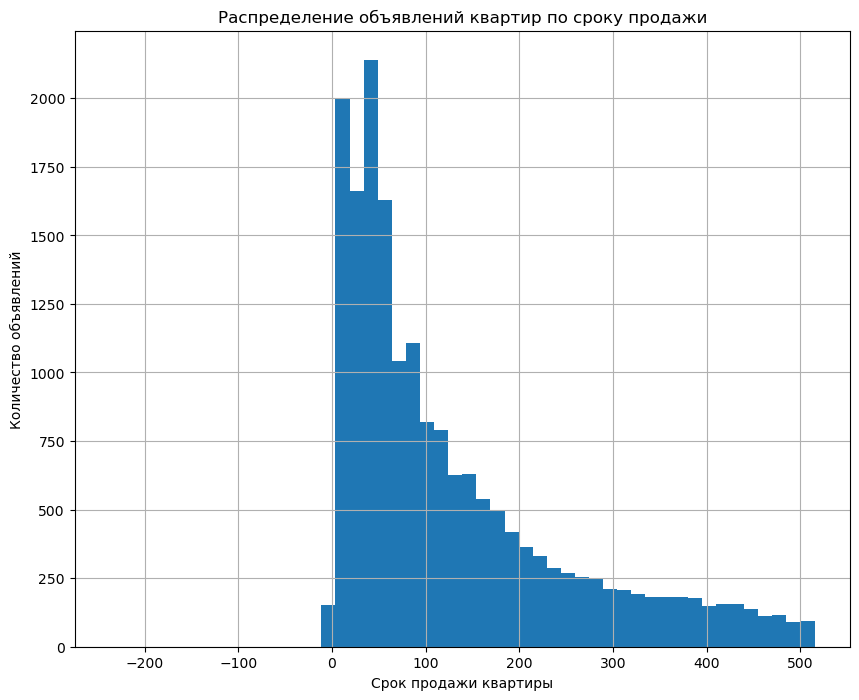

In [184]:
data['days_exposition'].hist(bins=50, range=(down_whisker, up_whisker),figsize=(10,8), grid=True)

plt.title('Распределение объявлений квартир по сроку продажи')
plt.xlabel('Срок продажи квартиры')
plt.ylabel('Количество объявлений')
plt.show()

In [185]:
print(f'Самые быстрые продажи до {q1} дней')

Самые быстрые продажи до 45.0 дней


In [186]:
print(f'Самые долгие продажи от {q3} дней')

Самые долгие продажи от 233.0 дней


<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 4.2.** Как видим из гистограммы и по квантилям, самые быстрые продажи происходили до 45 дней, самые долгие - от 233 дней. 
    
Однако, срок продажи зависит и от других факторов, таких как: удаленность от центра, стоимость, площадь квартиры и др. На следующем шаге проанализируем корреляцию между этими факторами и стоимостью объекта.

### Факторы, влияющие на стоимость объекта.

Проанализируем, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Для этого посмотрим, как эти параметры коррелируют между собой. Создадим функцию.

In [187]:
group_corr = ['total_area',
             'living_area',
             'kitchen_area',
             'rooms',
             'type_floor_num',
             'first_exposition_day_of_week',
             'first_exposition_month',
             'first_exposition_year']

for factor in group_corr:
    correlation = data['last_price'].corr(data[factor])
    print(f'Корреляция между last_price и {factor} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 64.31%
Корреляция между last_price и living_area составляет: 57.51%
Корреляция между last_price и kitchen_area составляет: 50.77%
Корреляция между last_price и rooms составляет: 35.37%
Корреляция между last_price и type_floor_num составляет: 5.56%
Корреляция между last_price и first_exposition_day_of_week составляет: 0.38%
Корреляция между last_price и first_exposition_month составляет: 0.51%
Корреляция между last_price и first_exposition_year составляет: -5.99%


Для того, чтобы показать детальнее и красочнее, что такие параметры как type_floor_num,first_exposition_day_of_week, first_exposition_month,first_exposition_year неэффективны при анализе стоимости квартиры, использую heatmap.

In [188]:
import seaborn as sns

Добавлю параметр last_price в group_corr:

In [189]:
group_corr = ['total_area',
             'living_area',
             'kitchen_area',
             'rooms',
             'type_floor_num',
             'first_exposition_day_of_week',
             'first_exposition_month',
             'first_exposition_year',
             'last_price']

Введу названия для параметров

In [190]:
name_corr = [
    'Общая площадь квартиры',
    'Жилая площадь',
    'Площадь кухни',
    'Количество комнат',
    'Этаж, на котором расположена квартира',
    'День недели публикации',
    'Месяц публикации',
    'Год публикации',
    'Стоимость'
]

In [191]:
correlation = data[group_corr].corr()

In [192]:
correlation

total_area  living_area  kitchen_area     rooms  \
total_area                      1.000000     0.945783      0.664606  0.758884   
living_area                     0.945783     1.000000      0.508052  0.832584   
kitchen_area                    0.664606     0.508052      1.000000  0.322680   
rooms                           0.758884     0.832584      0.322680  1.000000   
type_floor_num                  0.062094     0.055889      0.052886  0.022151   
first_exposition_day_of_week   -0.005734    -0.005776     -0.005080 -0.007120   
first_exposition_month          0.004179    -0.001511      0.002169 -0.000492   
first_exposition_year          -0.110863    -0.105670     -0.074583 -0.092135   
last_price                      0.643068     0.575053      0.507659  0.353671   

                              type_floor_num  first_exposition_day_of_week  \
total_area                          0.062094                     -0.005734   
living_area                         0.055889                     -0.005776   
kitchen_area                        0.052886                     -0.005080   
rooms                               0.022151                     -0.007120   
type_floor_num                      1.000000                      0.007391   
first_exposition_day_of_week        0.007391                      1.000000   
first_exposition_month              0.009431                      0.009274   
first_exposition_year               0.004233                      0.010565   
last_price                          0.055572                      0.003850   

                              first_exposition_month  first_exposition_year  \
total_area                                  0.004179              -0.110863   
living_area                                -0.001511              -0.105670   
kitchen_area                                0.002169              -0.074583   
rooms                                      -0.000492              -0.092135   
type_floor_num                              0.009431               0.004233   
first_exposition_day_of_week                0.009274               0.010565   
first_exposition_month                      1.000000              -0.199502   
first_exposition_year                      -0.199502               1.000000   
last_price                                  0.005122              -0.059861   

                              last_price  
total_area                      0.643068  
living_area                     0.575053  
kitchen_area                    0.507659  
rooms                           0.353671  
type_floor_num                  0.055572  
first_exposition_day_of_week    0.003850  
first_exposition_month          0.005122  
first_exposition_year          -0.059861  
last_price                      1.000000

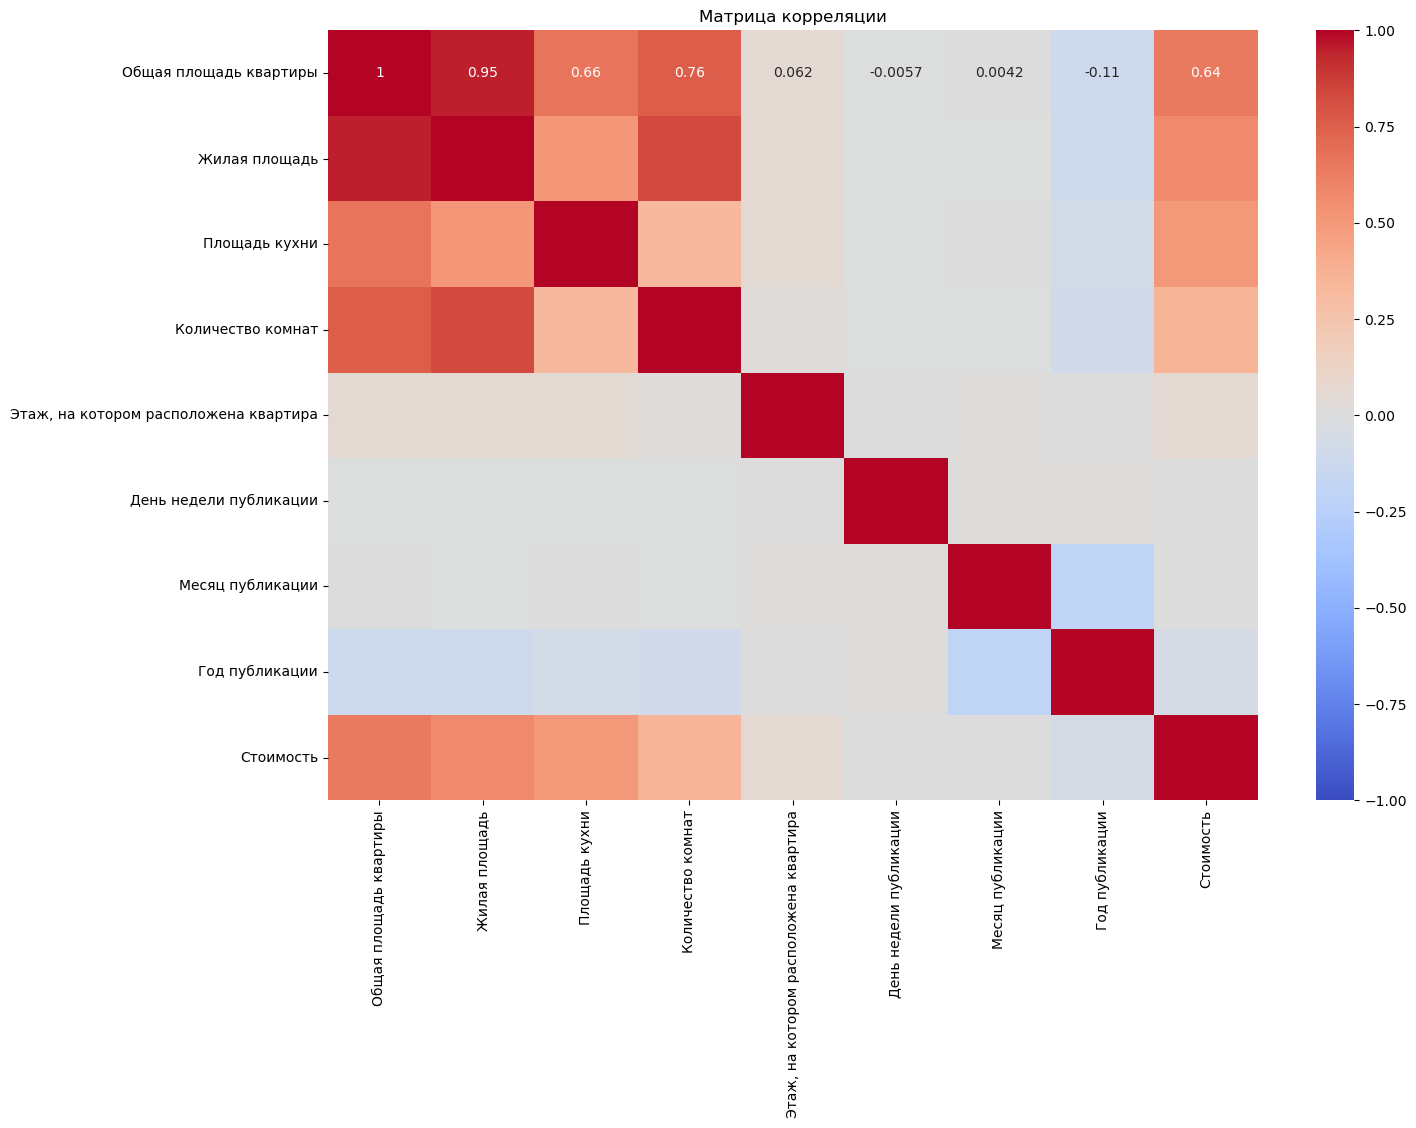

In [193]:
plt.figure(figsize = (15, 10))
sns.heatmap(correlation, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=name_corr,
            xticklabels=name_corr)
plt.title('Матрица корреляции')
plt.show()

Самая высокая корреляция между last_price и total_area, что не удивительно, ведь по логике, чем больше площадь квартиры, тем она дороже.   

Используем сводные таблицы и графики для визуального отображения зависимостей. 

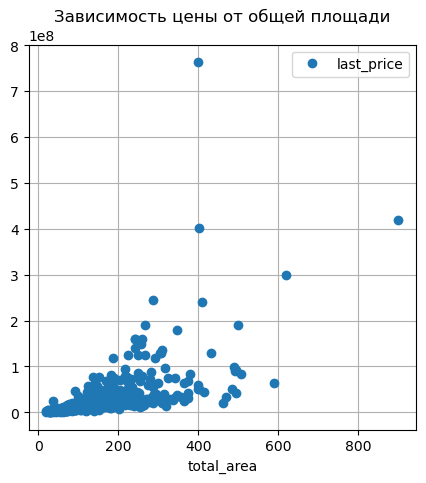

In [194]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

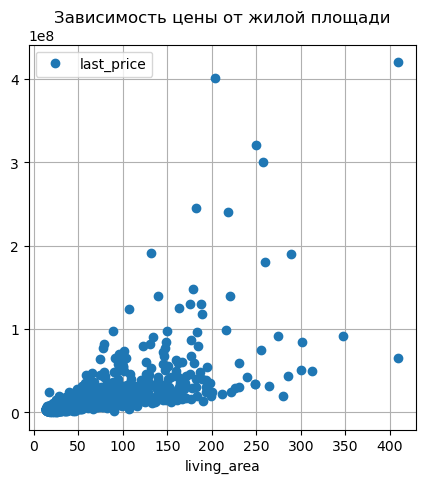

In [195]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

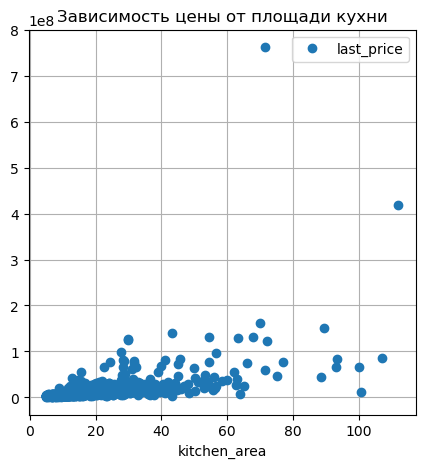

In [196]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

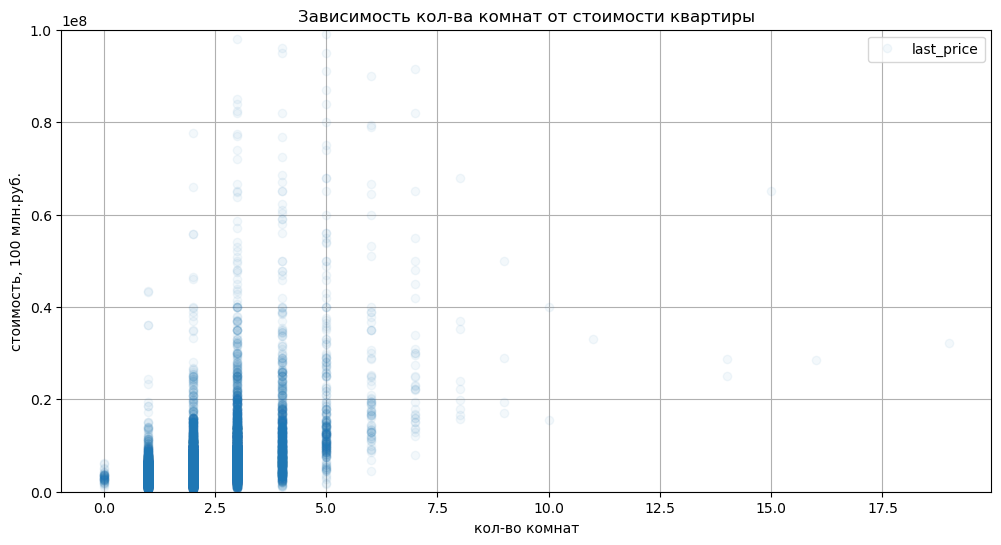

In [197]:
(
    data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
)
plt.title('Зависимость кол-ва комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

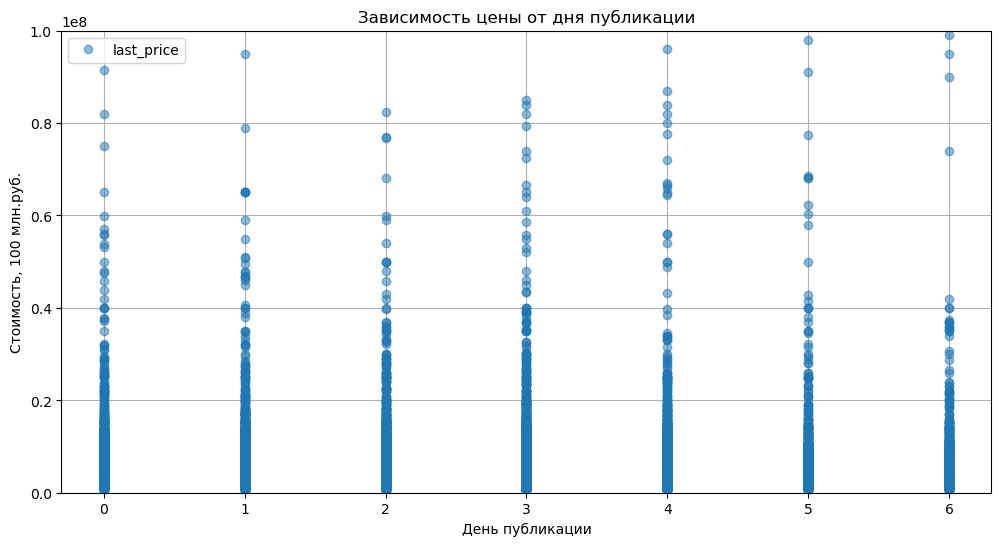

In [198]:
(
    data.plot(x = 'first_exposition_day_of_week', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
)
plt.title('Зависимость цены от дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()


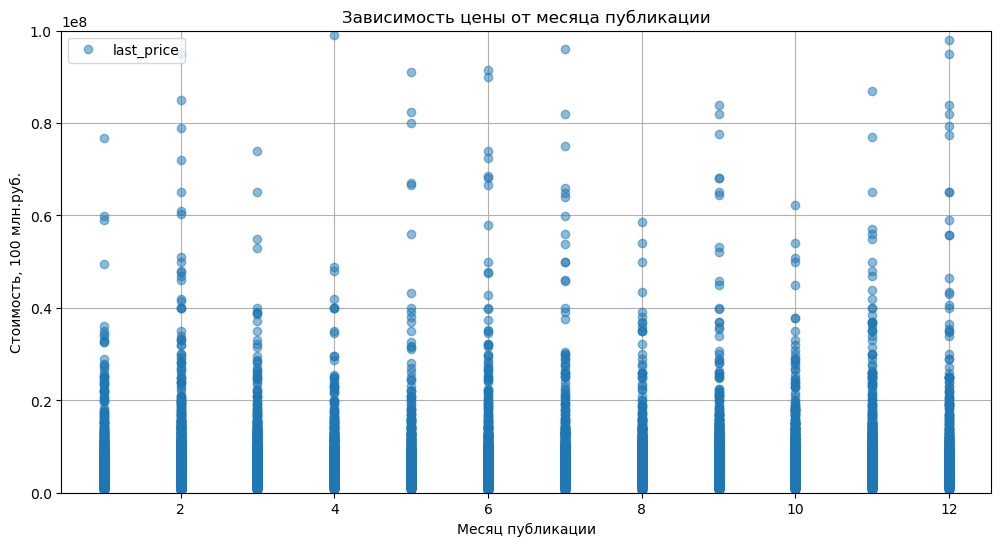

In [199]:
(
    data.plot(x = 'first_exposition_month', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
)
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

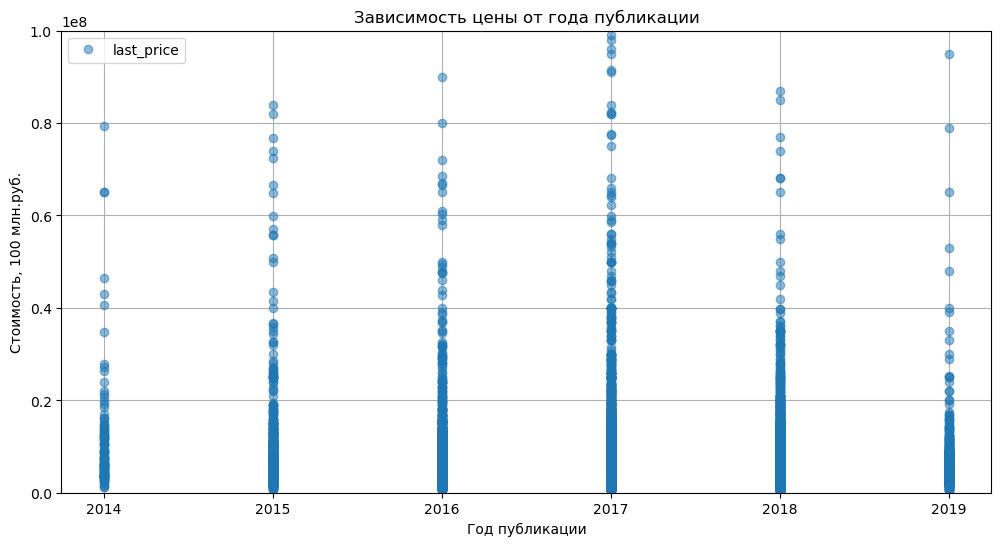

In [200]:
(
    data.plot(x = 'first_exposition_year', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
)
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

In [201]:
 data['type_floor'].value_counts()

type_floor
другой       14626
последний     2744
первый        2377
Name: count, dtype: int64

Сделаем сводную таблицу для расчетов связи между стоимостью квартиры и этажом.

mean  count     median
type_floor                                
другой      6.513789e+06  14626  4755481.0
первый      4.558152e+06   2377  3880000.0
последний   7.043040e+06   2744  4300000.0

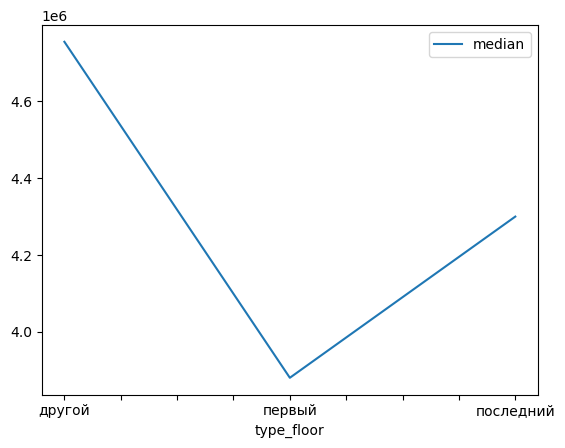

In [202]:
pivot_table_type_floor = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_type_floor.columns = ['mean', 'count', 'median']
pivot_table_type_floor.plot(y = 'median', legend=True)
pivot_table_type_floor

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 4.3.** По корреляции и по графикам можно выделить следующие выводы:

* Чем больше площадь квартиры, тем выше ее цена, это подтверждается корреляционной зависимостью.
* Также корреляция наблюдается между стоимостью объекта, жилой площадью и количеством комнат.
* Исключается зависимость стоимости объекта от даты публикации.
* Квартиры на первом этаже стоят дешевле, чем квартиры на других этажах. При этом стоимость квартир на других этажах, кроме первого и последнего, самая высокая.
    
Причины роста цен на недвижимость в 2019 году:

* Изменения в 214-ФЗ. Каждый новый объект застройки должен получить своё собственное разрешение на строительство, что замедлит темпы нового строительства и увеличит его стоимость.
* Рост страховых взносов. Отчисления в страховые компании — значительная статья расходов застройщиков.
* Повышение НДС до 20 %. 

###  Анализ стоимости квадратного метра

Найдем среднюю цену 1 кв.м в 10 населённых пунктах с наибольшим числом объявлений. Для этого построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.

Начнем с ТОП-10 населенных пунктов

In [203]:
top_10_locality = data['locality_name'].value_counts().head(10)
top_10_locality

locality_name
санкт-петербург    13232
мурино               472
кудрово              394
шушары               386
всеволожск           328
колпино              305
пушкин               302
парголово            280
гатчина              264
выборг               202
Name: count, dtype: int64

Выведем среднюю цену за кв.м по ТОП-10 населенным пунктам

In [204]:
top_10_locality_pivot_table = data.query('locality_name in @top_10_locality.index').pivot_table(index='locality_name', values='per_sqm_price')
top_10_locality_pivot_table.sort_values(by='per_sqm_price', ascending=False)

per_sqm_price
locality_name                 
санкт-петербург  112148.826996
пушкин           102121.707296
кудрово           93560.575546
парголово         88963.079966
мурино            84442.058249
шушары            76610.399262
колпино           74724.061740
всеволожск        68558.738760
гатчина           68232.190332
выборг            56533.456465

Отобразим на графике среднюю цену квадратного метра в ТОП-10 населенных пунктах

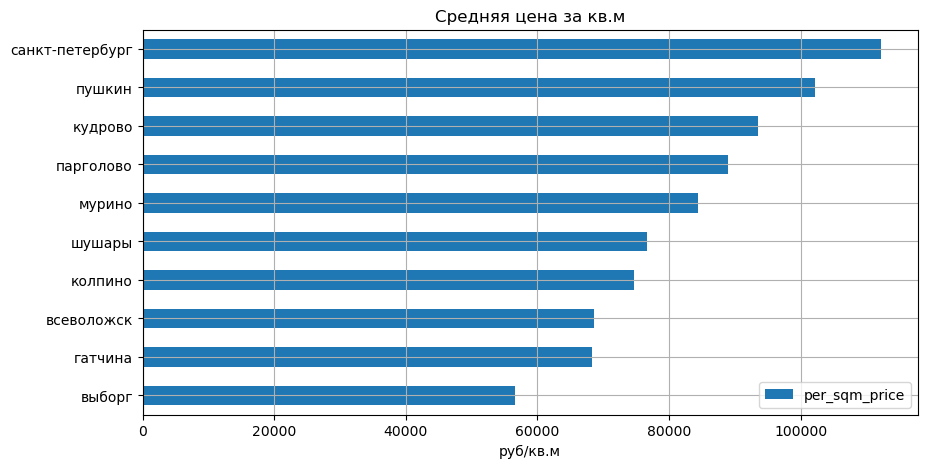

In [205]:
top_10_locality_pivot_table.sort_values(by='per_sqm_price').plot(kind='barh', legend=True, grid=True, figsize=(10, 5))

plt.title('Средняя цена за кв.м')
plt.xlabel('руб/кв.м')
plt.ylabel('')
plt.show()

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 4.4.** По сводной таблице и графику видно, что самая высокая цена за кв.м. в Санкт-Петербурге (112148 руб.), что логично, так как это центр области. Следующие по стоимости за квадратный метр идут Пушкин (102121 руб.) и Кудрово (93560 руб.).

У Пушкина, как и у Кудрово, удобное расположение. Они находятся в непосредственной близости от Санкт-Петербурга, что делает их привлекательными для тех, кто предпочитает жить за городом, но оставаться в доступности от всех городских удобств.

Самая низкая цена за кв.метр у Гатчины, Всеволожска и Выборга, так как они находятся дальше от Петербурга и, возможно, не имеют тех особенностей инфраструктуры как Пушкин или Кудрово.

### Cредняя стоимость квартир  в Петербурге на разном удалении от центра

Выделяем квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычисляем их среднюю стоимость на разном удалении от центра.

Выбираем только Санкт-Петербург:

In [206]:
data_spb = data.query('locality_name == "санкт-петербург"')

In [207]:
len(data_spb)

13232

Всего у нас 13232 объявления для Санкт-Петербурга. Определим центр города с помощью стоимости квадратного метра, для этого построим график. Так как цена в пределах центра города обычно выше, то там, где она начнет уменьшаться, там могут быть границы города.

Рассчитаем среднюю цену кв. метра до центра

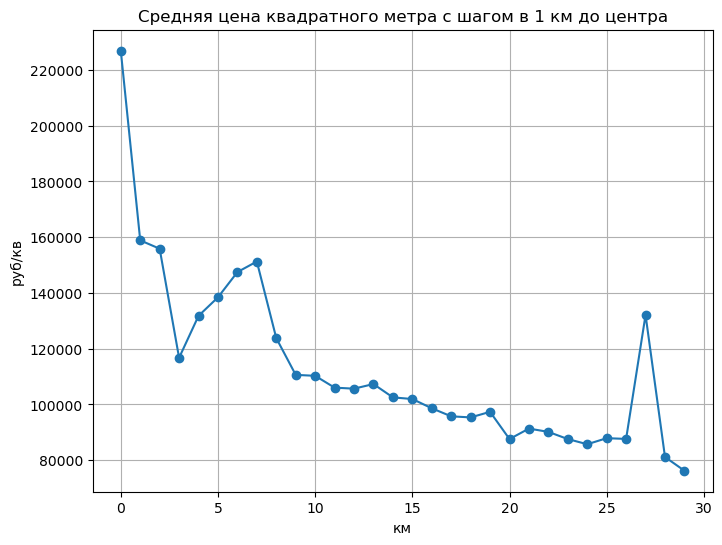

In [208]:
(
data_spb
    .pivot_table(index='to_center_km', values='per_sqm_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра с шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб/кв')
plt.show()

Из данных графика можем увидеть, что после 8 км график принимает линейную форму и стоимость уменьшается. Т.е. в зоне до 8 км от центра сохраняется максимальная стоимость. Наблюдается пик после 25 км, возможно, это связано с элитной недвижимостью за пределами Санкт-Петербурга или на его окраинах. 

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19747 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  19747 non-null  int64         
 1   last_price                    19747 non-null  int64         
 2   total_area                    19747 non-null  float64       
 3   first_day_exposition          19747 non-null  datetime64[ns]
 4   rooms                         19747 non-null  int64         
 5   ceiling_height                19747 non-null  float64       
 6   floors_total                  19747 non-null  int8          
 7   living_area                   19747 non-null  float64       
 8   floors                        19747 non-null  int64         
 9   is_apartment                  19747 non-null  bool          
 10  studio                        19747 non-null  bool          
 11  open_plan                     197

<div style="border:solid orange 2px; padding: 20px">
    
**Вывод по 4.5.** На графике можно увидеть реальную картину: самая высокая стоимость объектов расположена в близости к центру (до 1 км).
    
Можно заметить линейную зависимость: чем дальше от центра, тем сильнее падает цена. За исключением пика в 27 км, который может представлять элитную недвижимость.

<div style="border:solid blue 2px; padding: 20px">
    
## Вывод по разделу 4. <a class="tocSkip">
    
    
Этот пункт был посвящен исследовательскому анализу данных, где были рассмотрены и частично удалены выбросы в следующих параметрах:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка.
    

Были получены следующие результаты по влиянию ряда факторов на стоимость недвижимости, а именно:
* чем больше площадь квартиры, тем она дороже;
* квартиры на первом и последнем этажах дешевле, чем на других;
* стоимость за квадратный метр выше всего в Санкт-Петербурге, а ниже в Выборге.
* чем ближе к центру, тем квартиры дороже;
* исключается взаимосвязь стоимости с датой публикации.

<div style="border:solid blue 2px; padding: 20px">
    
## Общий вывод
Проект оказался объемным для исследования, так, первоначальный файл содержал 22 столбца и 23699 значений. На конец исследования файл содержал в себе 29 столбцов и 19747 значений, было удалено порядка 15% некорректных данных.
    
1) Во время работы было замечено некорректное наименование столбцов, которое было поправлено:
    
    * cityCenters_nearest;
    * parks_around3000;
    * ponds_around3000.
    
2) Были удалены, либо заменены 0 или медианными значениями пропущенные значения.
    
3) Так как данные были добавлены разными способами и в ряде столбцов было большое количество пропущенных значений (порядка 15 тыс. в одном столбце), есть вероятность, что данные были искажены по следующим причинам:
    
    * человеческий фактор. Кто-то мог скрыть информацию о своих квартирах, или сделать опечатку;
    * технические проблемы с автоматическим заполнением данных;
    * поврежденный файл;
    * некорректный ввод данных.

4) Было удалено более 50 дубликатов в названиях населенных пунктов.

5) Задачей проекта было выявить, какие параметры влияют на рыночную стоимость объектов недвижимости. В ходе исследования было установлено, что:
    
    * чем больше площадь квартиры, тем она дороже;
    * чем больше жилая площадь и площадь кухни, тем дороже квартира;
    * квартиры на первом и последнем этажах дешевле, чем на других;
    * стоимость за квадратный метр выше всего в Санкт-Петербурге, а ниже в Выборге;
    * чем ближе к центру, тем квартиры дороже;
    * исключается взаимосвязь стоимости с датой публикации.
   
Таким образом, такие параметр, как total_area, type_floor, city_centers_nearest влияют на стоимость недвижимости. Но больше всего корреляция выражена между стоимостью квартиры и ее площадью. 
    
6) Был выявлен типичный объект недвижимости. В основном в продаже находились 1-2-х комнатные квартиры с площадью от 30 до 60 кв.м. с жилой площадью от 14 кв.м до 30 кв.м. стоимостью от 3,5 до 6 млн рублей. 
    
Высота потолка в таких квартирах - 2,65 м, а квартиры находятся в 5-9-этажных домах на расстоянии 13 км от центра.
    
7) С помощью графиков была определена граница зоны центра города, где были максимальные цены на недвижимость. Она распространяется на 8 км.
    
8) Самые быстрые продажи недвижимости совершались до 45 дней, а самые длинные от 233-х дней. 
    
9) Самая высокая стоимость среднего квадратного метра была в Санкт-Петербурге:112148 руб.
Самая низкая стоимость среднего квадратного метра была в Выборге: 56533 руб. 
    
Таким образом, задача, поставленная перед началом работы, была выполнена.   
